<h1 align="center">Fase 1 - Data Analysis and Exploration</h1>

## Módulo 01 - Análise Exploratória de Dados

### Aula 3 - Manipulação de Dados

#### 1. Para realizar a análise dos dados, as seguintes bibliotecas foram utilizadas:

* **os**: para manipulação de arquivos.
* **sys**: para manipulação de arquivos.
* **Pandas**: para manipulação e análise dos dados.
* **Numpy**: para manipulação de arrays e matrizes.
* **Matplotlib**: para visualização dos dados.
* **Seaborn**: para visualização dos dados.


In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

# Limpar entradas duplicadas no PATH
sys.path = list(set(sys.path))

# Adicionando o caminho da pasta onde o arquivo visualization.py está localizado
sys.path.append('/home/naina/Projects/pos_fiap/scripts/utils')

# Agora você pode importar o arquivo corretamente
from visualization import *



#### 2. Aquisição dos dados
Os dados utilizados nesta análise foram obtidos a partir do site [DATASUS](https://datasus.saude.gov.br/acesso-a-informacao/producao-hospitalar-sih-sus/), contendo informações detalhadas sobre os valores registrados no momento do atendimento hospitalar. Este dataset reflete os custos estimados no instante em que o paciente é atendido, fornecendo uma visão inicial e imediata dos gastos associados a cada internação. Estes dados são particularmente valiosos para entender a distribuição e o impacto financeiro dos atendimentos em tempo real, auxiliando no planejamento e alocação imediata de recursos nas unidades de saúde.

##### 2.1 Ajuste da Apresentação dos Dados
Para adequar a apresentação dos dados ao padrão brasileiro, onde a vírgula é usada como separador decimal e o ponto como separador de milhar, foi necessário ajustar a formatação de exibição dos valores numéricos. Em Python, por padrão, os números flutuantes são exibidos com o ponto como separador decimal. Para melhorar a legibilidade dos dados e adequar-se às convenções locais, foi utilizado o seguinte código:

In [2]:
# Corrigindo o caminho para subir um nível na estrutura de diretórios antes de acessar 'data/raw'
file_path = os.path.join('..', '..', 'data', 'raw', 'sih_cnv_qiuf201539177_212_141_162.csv')

# Carregar o DataFrame a partir do CSV localizado no diretório 'raw'
df_atendimento = pd.read_csv(file_path, encoding='ISO-8859-1', skiprows=3, sep=';', 
                               thousands='.', decimal=',', skipfooter=12, engine='python')



# Ajuste da apresentação dos dados para exibir vírgula como separador decimal
pd.options.display.float_format = lambda x: f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

# Exibir as primeiras linhas
df_atendimento.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,"12.517.843,44","12.554.967,21","11.878.718,51","11.395.300,88","9.792.549,16","8.104.206,09","6.275.935,03","4.143.349,11","1.210.876,87","1.446.704.922,33"
1,12 Acre,-,-,-,-,-,-,-,-,-,...,"4.433.998,52","4.436.469,66","4.253.339,65","4.404.809,58","4.478.164,90","4.764.699,46","4.488.757,08","3.406.321,94","1.574.829,36","615.416.604,48"
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,"17.415.667,58","19.229.221,65","18.603.854,01","21.710.451,55","18.907.790,91","21.767.764,51","19.920.938,48","17.883.906,15","6.915.472,45","2.728.085.655,80"
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,"2.888.659,62","2.930.357,34","3.191.502,58","2.784.557,45","2.113.499,72","1.783.130,45","174.731,35","120.854,25","46.874,26","467.066.312,33"
4,15 Pará,-,-,-,-,-,-,-,-,-,...,"52.858.032,69","58.378.834,51","50.760.448,73","52.655.209,50","51.032.476,18","53.019.044,69","46.891.419,15","34.678.768,60","13.453.260,79","6.589.319.524,97"


#### 3. Análise Exploratória dos Dados

##### 3.1. Entendendo dos Dados
Para iniciar a análise, é importante entender a estrutura dos dados e as informações disponíveis.


In [3]:
df_atendimento.columns

Index(['Unidade da Federação', '1992/Mar', '1992/Abr', '1993/Mai', '1993/Dez',
       '1994/Jan', '1994/Fev', '1994/Mai', '1994/Ago', '1994/Nov',
       ...
       '2023/Out', '2023/Nov', '2023/Dez', '2024/Jan', '2024/Fev', '2024/Mar',
       '2024/Abr', '2024/Mai', '2024/Jun', 'Total'],
      dtype='object', length=326)

##### **Dicionário de Dados**
Um dicionário de dados foi criado para facilitar a compreensão das informações contidas no dataset. As colunas presentes no dataset são:

* **Unidade da Federação**: unidade federativa onde o registro foi lançado.
* **Ano/Mês do Lançamento**: ano e mês em que o registro foi lançado.
* **Total**: O total dos valores de atendimentos iniciais hospitalares (AIH) realizados na unidade federativa.

##### 3.2. Verificação dos Dados
Nesta etapa, foi realizada uma inspeção minuciosa do dataset para assegurar sua integridade e qualidade antes de prosseguir com a análise. A verificação dos dados inclui:

- **Exploração Inicial:** Leitura do dataset para entender a estrutura dos dados, as variáveis disponíveis e o volume de registros.
- **Validação de Consistência:** Verificação de inconsistências, como valores ausentes, duplicações e anomalias que possam impactar a análise.
- **Sumarização Estatística:** Geração de estatísticas descritivas das variáveis para obter uma visão geral das distribuições e identificar possíveis outliers.

In [4]:
# Exibir dados do DataFrame
df_atendimento

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,"12.517.843,44","12.554.967,21","11.878.718,51","11.395.300,88","9.792.549,16","8.104.206,09","6.275.935,03","4.143.349,11","1.210.876,87","1.446.704.922,33"
1,12 Acre,-,-,-,-,-,-,-,-,-,...,"4.433.998,52","4.436.469,66","4.253.339,65","4.404.809,58","4.478.164,90","4.764.699,46","4.488.757,08","3.406.321,94","1.574.829,36","615.416.604,48"
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,"17.415.667,58","19.229.221,65","18.603.854,01","21.710.451,55","18.907.790,91","21.767.764,51","19.920.938,48","17.883.906,15","6.915.472,45","2.728.085.655,80"
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,"2.888.659,62","2.930.357,34","3.191.502,58","2.784.557,45","2.113.499,72","1.783.130,45","174.731,35","120.854,25","46.874,26","467.066.312,33"
4,15 Pará,-,-,-,-,-,-,-,-,-,...,"52.858.032,69","58.378.834,51","50.760.448,73","52.655.209,50","51.032.476,18","53.019.044,69","46.891.419,15","34.678.768,60","13.453.260,79","6.589.319.524,97"
5,16 Amapá,-,-,-,-,-,-,-,-,-,...,"3.621.900,80","3.263.823,25","3.347.139,90","4.009.875,37","3.499.564,15","4.059.123,00","3.731.018,03","3.793.604,82","2.026.080,76","454.244.659,82"
6,17 Tocantins,-,-,-,-,-,-,-,-,-,...,"10.135.542,98","9.701.812,67","9.632.124,69","9.237.273,45","9.572.666,16","9.753.104,56","8.138.826,15","4.985.743,47","2.319.561,63","1.423.360.586,79"
7,21 Maranhão,-,-,-,-,-,-,-,-,-,...,"41.972.300,25","40.501.098,01","38.004.052,79","41.497.369,48","38.607.311,23","41.885.979,98","37.522.351,20","30.708.318,49","13.741.492,12","5.464.095.395,44"
8,22 Piauí,-,-,-,-,-,-,-,-,-,...,"23.444.748,65","22.259.207,28","21.009.128,47","22.059.611,11","20.423.284,54","22.397.541,19","20.498.973,49","16.867.157,79","9.652.382,49","3.168.311.617,59"
9,23 Ceará,-,-,-,-,-,-,-,-,-,...,"66.820.475,94","63.968.404,99","62.941.872,38","68.104.664,24","63.811.880,19","65.031.493,74","64.193.695,76","47.716.409,58","22.694.949,43","9.201.831.945,25"


##### **Observação:**
Há uma ausência de dados nos anos iniciais, que começa em 1992 e depois aumenta a quantidade dos dados gradativamente. Foi registrado nos campos de valores que possam ser ausentes, uma caracter especial `-` para indicar a ausência. Já no coluna de Unidade da Federação, existe dígitos númericos que se referem regiões do Brasil, mas que tonam-se redundantes, visto que a informação já está contida no nome da Unidade da Federação.

In [5]:
# Exibir informações do DataFrame
df_atendimento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 326 entries, Unidade da Federação to Total
dtypes: float64(204), object(122)
memory usage: 68.9+ KB


##### **Observação:** 
existe uma discrepância como os tipos de dados estão distribuídos no DataFrame. É possível perceber um desbalanceamento de tipos de dados, pois existe uma única coluna categórica "Unidade da Federação", que deveria ser do tipo `object` (string), enquanto as demais colunas deveriam ser do tipo `float64`, representando dados quantitativos. No entanto, temos 121 colunas que estão erroneamente classificadas como `object`. Essa discrepância pode impactar a precisão e eficácia da análise de dados, pois colunas que deveriam ser processadas como numéricas não estão sendo tratadas corretamente. Para garantir a integridade da análise, é essencial realizar uma limpeza dessas colunas, identificar os valores problemáticos e converter as colunas para o tipo `float64`. 

In [6]:
# Exibir os tipos de dados do DataFrame
df_atendimento.dtypes.to_frame('Tipos de Dados')

,Tipos de Dados
Unidade da Federação,object
1992/Mar,object
1992/Abr,object
1993/Mai,object
1993/Dez,object
...,...
2024/Mar,float64
2024/Abr,float64
2024/Mai,float64
2024/Jun,float64


##### **Observação:** 
As colunas do tipo object claramente tem valores faltantes representados por `-`. Como não é possível definir se esses valores são nulos ou zero, é importante tratar esses valores de forma adequada para não comprometer a análise. Uma abordagem comum é substituir esses valores por `np.nan`, que é a representação padrão de valores nulos em Python. Porém a orientação dada em curso foi de só utilizar as colunas que foram completadas, ou seja, que não possuem valores faltantes.

In [7]:
# Exibir as colunas do dataframe do tipo object
colunas_object = [coluna for coluna in df_atendimento.columns if df_atendimento[coluna].dtype == object]
print(colunas_object)
    

['Unidade da Federação', '1992/Mar', '1992/Abr', '1993/Mai', '1993/Dez', '1994/Jan', '1994/Fev', '1994/Mai', '1994/Ago', '1994/Nov', '1995/Jan', '1995/Mar', '1995/Jun', '1995/Ago', '1995/Dez', '1996/Fev', '1996/Mar', '1996/Ago', '1996/Dez', '1997/Fev', '1997/Nov', '1998/Fev', '1998/Mar', '1998/Jul', '1998/Ago', '1998/Set', '1998/Out', '1998/Dez', '1999/Fev', '1999/Mar', '1999/Mai', '1999/Jul', '1999/Ago', '1999/Set', '1999/Out', '1999/Nov', '1999/Dez', '2000/Jan', '2000/Fev', '2000/Mar', '2000/Abr', '2000/Mai', '2000/Jun', '2000/Jul', '2000/Ago', '2000/Set', '2000/Out', '2000/Nov', '2000/Dez', '2001/Jan', '2001/Fev', '2001/Mar', '2001/Abr', '2001/Mai', '2001/Jun', '2001/Jul', '2001/Ago', '2001/Set', '2001/Nov', '2001/Dez', '2002/Jan', '2002/Fev', '2002/Mar', '2002/Mai', '2002/Jun', '2002/Jul', '2002/Out', '2002/Nov', '2002/Dez', '2003/Jan', '2003/Fev', '2003/Mar', '2003/Abr', '2003/Jun', '2003/Jul', '2003/Ago', '2003/Out', '2003/Nov', '2003/Dez', '2004/Jan', '2004/Fev', '2004/Mar', '20

In [8]:
#exibindo as colunas de "1992/Mar" até "2007/jul" - excetuando a coluna 'Unidade da Federação' pois essa coluna é importante para identificar a localização dos dados
df_atendimento.loc[:, '1992/Mar':'2007/Jul']

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,...,2006/Out,2006/Nov,2006/Dez,2007/Jan,2007/Fev,2007/Mar,2007/Abr,2007/Mai,2007/Jun,2007/Jul
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,604.33,-,-,-,-,-
1,-,-,-,-,-,-,-,-,-,-,...,-,-,-,184.65,-,-,-,-,1099.17,-
2,-,-,-,-,-,-,-,-,-,-,...,-,-,-,1134.83,951.89,-,531.94,-,-,212.75
3,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,413.69,-
4,-,-,-,-,-,-,-,-,-,-,...,-,-,-,4994.86,2182.97,-,-,210.20,399.57,9487.90
5,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,1647.39,7754.72,12695.61
6,-,-,-,-,-,-,-,-,-,-,...,-,-,1122.46,-,578.69,-,-,-,34446.08,586.69
7,-,-,-,-,-,-,-,-,-,-,...,-,-,-,2767.08,2871.13,-,295.36,7090.58,-,42360.79
8,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,162.01,-,-,428.77,-,12172.72
9,-,-,-,-,-,-,-,-,-,-,...,-,-,-,149.65,3186.33,-,-,-,-,3698.69


In [9]:
#excluindo as colunas de "1992/Mar" até "2007/jul" - excetuando a coluna 'Unidade da Federação' pois essa coluna é importante para identificar a localização dos dados
df_atendimento = df_atendimento.drop(df_atendimento.loc[:, '1992/Mar':'2007/Jul'].columns, axis=1)

In [10]:
#exibindo os tipo de dados do dataframe para conferir se as colunas foram excluídas
df_atendimento.dtypes.to_frame('Tipos de Dados')


,Tipos de Dados
Unidade da Federação,object
2007/Ago,float64
2007/Set,float64
2007/Out,float64
2007/Nov,float64
...,...
2024/Mar,float64
2024/Abr,float64
2024/Mai,float64
2024/Jun,float64


In [11]:
# Verificar valores duplicados
df_atendimento.duplicated().sum()

np.int64(0)

##### 3.3. Limpeza dos Valores Categóricos
   
- **Descrição:** Nesta etapa, foi realizada a limpeza dos valores da coluna "Unidade da Federação". Observou-se que essa coluna categórica continha números seguidos por um espaço no início de cada registro, representando o código da unidade federativa. Como esses números não são necessários para a análise, foi necessário removê-los para garantir que a coluna contenha apenas o nome do estado.

- **Ação Realizada:** Foi utilizada a função str.replace() do Pandas, em conjunto com uma expressão regular, para remover os números e o espaço inicial de cada registro na coluna "Unidade da Federação".

In [12]:
# Assegurando que a coluna "Unidade da Federação" permaneça como string
df_atendimento['Unidade da Federação'] = df_atendimento['Unidade da Federação'].astype(str)
# Removendo os números e o espaço no início dos nomes das unidades federativas
# na coluna "Unidade da Federação".
df_atendimento['Unidade da Federação'] = df_atendimento['Unidade da Federação'].str.replace(r'^\d+\s+', '', regex=True)

df_atendimento.head( )


,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,Total
0,Rondônia,"4.209,37","16.397,03","133.645,19","346.912,84","711.758,31","1.829.559,71","1.940.792,63","1.955.721,68","2.143.353,81",...,"12.517.843,44","12.554.967,21","11.878.718,51","11.395.300,88","9.792.549,16","8.104.206,09","6.275.935,03","4.143.349,11","1.210.876,87","1.446.704.922,33"
1,Acre,"10.470,07","14.001,71","86.200,85","301.323,68","769.612,36","1.731.744,62","1.743.978,66","2.057.439,02","2.057.829,69",...,"4.433.998,52","4.436.469,66","4.253.339,65","4.404.809,58","4.478.164,90","4.764.699,46","4.488.757,08","3.406.321,94","1.574.829,36","615.416.604,48"
2,Amazonas,"35.752,72","45.570,64","416.012,30","2.020.381,79","5.949.408,99","11.419.210,08","7.934.652,10","8.641.517,13","8.531.576,49",...,"17.415.667,58","19.229.221,65","18.603.854,01","21.710.451,55","18.907.790,91","21.767.764,51","19.920.938,48","17.883.906,15","6.915.472,45","2.728.085.655,80"
3,Roraima,"4.785,91","11.858,63","43.852,67","369.328,51","470.676,43","808.448,39","771.687,83","876.091,18","896.952,53",...,"2.888.659,62","2.930.357,34","3.191.502,58","2.784.557,45","2.113.499,72","1.783.130,45","174.731,35","120.854,25","46.874,26","467.066.312,33"
4,Pará,"181.159,29","433.414,74","1.893.197,50","5.105.406,44","13.162.823,43","21.762.104,16","20.126.081,01","22.149.375,82","23.436.682,75",...,"52.858.032,69","58.378.834,51","50.760.448,73","52.655.209,50","51.032.476,18","53.019.044,69","46.891.419,15","34.678.768,60","13.453.260,79","6.589.319.524,97"


##### **Criando cópia do DataFrame após tratamento dos dados**
- **Descrição:** Após a conclusão do tratamento dos dados, foi criada uma cópia do DataFrame contendo as alterações realizadas. Essa cópia servirá como base para a análise exploratória e visualização dos dados, garantindo que as transformações sejam refletidas nas etapas subsequentes.

In [13]:
df_atendimento_clean = df_atendimento.copy()
df_atendimento_clean.to_csv('../../data/processed/Atendimento_SIH_SUS.csv', index=False)

In [14]:
#setando a coluna 'Unidade da Federação' como índice
df_atendimento_clean = df_atendimento_clean.set_index('Unidade da Federação')
df_atendimento_clean.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
Rondônia,"4.209,37","16.397,03","133.645,19","346.912,84","711.758,31","1.829.559,71","1.940.792,63","1.955.721,68","2.143.353,81","2.280.382,58",...,"12.517.843,44","12.554.967,21","11.878.718,51","11.395.300,88","9.792.549,16","8.104.206,09","6.275.935,03","4.143.349,11","1.210.876,87","1.446.704.922,33"
Acre,"10.470,07","14.001,71","86.200,85","301.323,68","769.612,36","1.731.744,62","1.743.978,66","2.057.439,02","2.057.829,69","2.226.577,93",...,"4.433.998,52","4.436.469,66","4.253.339,65","4.404.809,58","4.478.164,90","4.764.699,46","4.488.757,08","3.406.321,94","1.574.829,36","615.416.604,48"
Amazonas,"35.752,72","45.570,64","416.012,30","2.020.381,79","5.949.408,99","11.419.210,08","7.934.652,10","8.641.517,13","8.531.576,49","9.079.902,15",...,"17.415.667,58","19.229.221,65","18.603.854,01","21.710.451,55","18.907.790,91","21.767.764,51","19.920.938,48","17.883.906,15","6.915.472,45","2.728.085.655,80"
Roraima,"4.785,91","11.858,63","43.852,67","369.328,51","470.676,43","808.448,39","771.687,83","876.091,18","896.952,53","1.027.288,73",...,"2.888.659,62","2.930.357,34","3.191.502,58","2.784.557,45","2.113.499,72","1.783.130,45","174.731,35","120.854,25","46.874,26","467.066.312,33"
Pará,"181.159,29","433.414,74","1.893.197,50","5.105.406,44","13.162.823,43","21.762.104,16","20.126.081,01","22.149.375,82","23.436.682,75","23.861.080,80",...,"52.858.032,69","58.378.834,51","50.760.448,73","52.655.209,50","51.032.476,18","53.019.044,69","46.891.419,15","34.678.768,60","13.453.260,79","6.589.319.524,97"


#### 4. Visualização dos Dados

##### 4.1. Para passar a informação de forma clara e objetiva é preciso ter atenção e cuidado a forma de apresentação dos dados.

<Axes: xlabel='Unidade da Federação'>

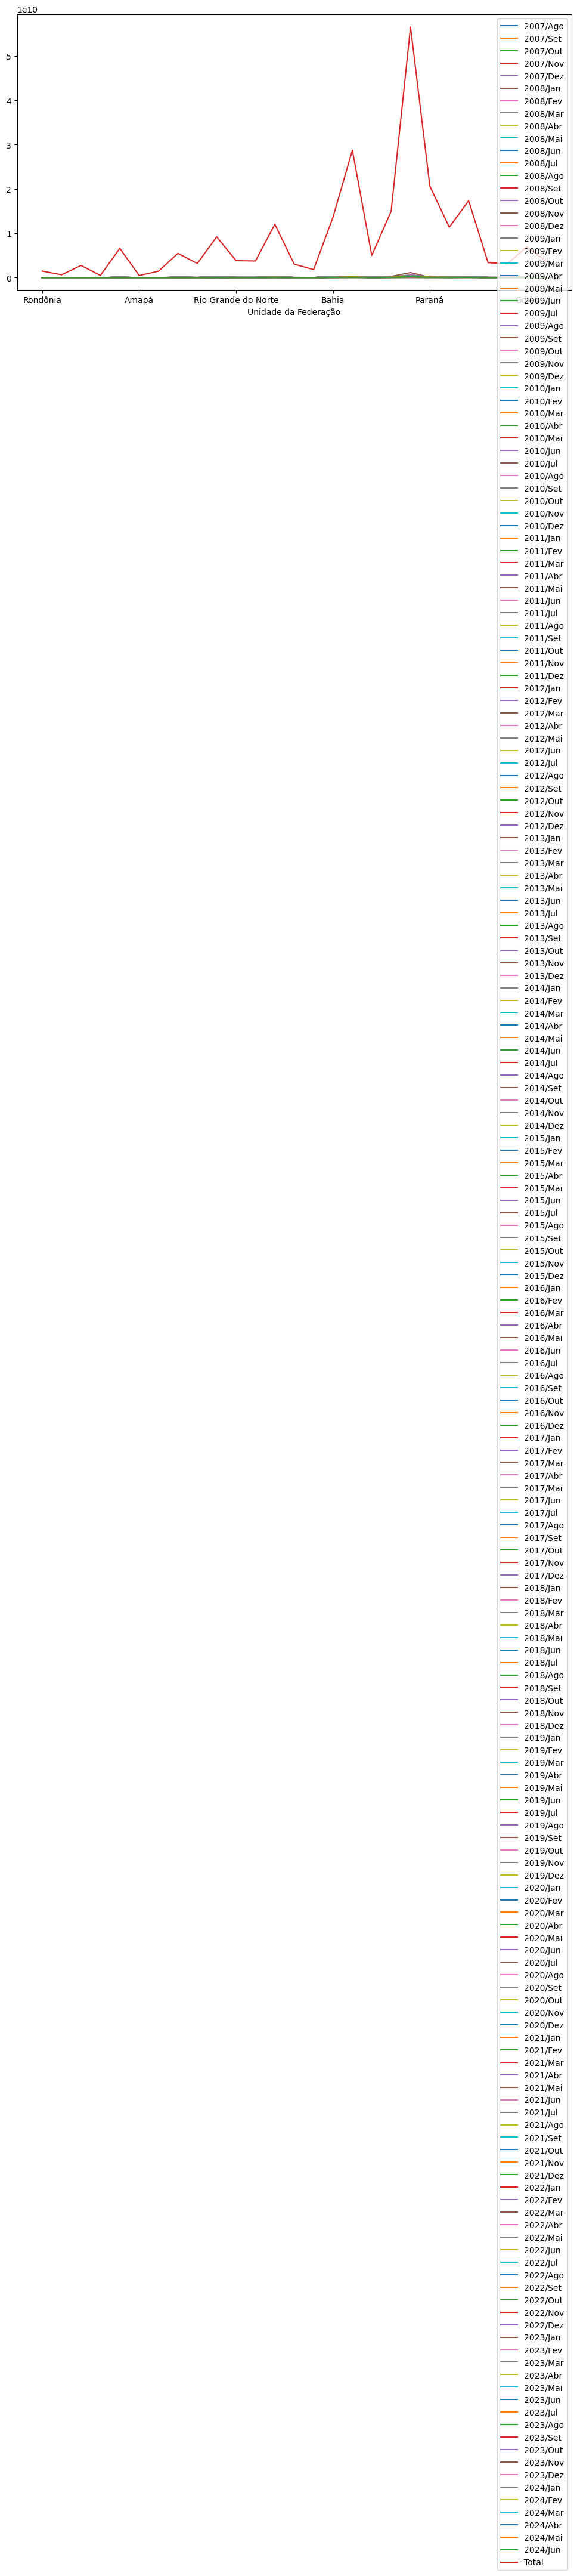

In [15]:
#plotando o gráfico
df_atendimento_clean.plot(figsize=(12,6))

In [16]:
#transpondo os dados
df_atendimento_clean.T

Unidade da Federação,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
2007/Ago,"4.209,37","10.470,07","35.752,72","4.785,91","181.159,29","33.672,74","4.113,76","385.330,18","220.788,25","357.904,65",...,"57.408,11","469.469,34","1.665.349,90","554.800,22","693.955,05","1.049.252,33","199.556,12","63.562,50","179.395,82","191.951,47"
2007/Set,"16.397,03","14.001,71","45.570,64","11.858,63","433.414,74","104.822,98","76.633,06","1.018.352,93","353.468,67","572.356,18",...,"284.224,80","921.646,57","4.434.168,64","1.431.708,01","1.092.964,12","3.182.913,14","573.675,41","232.444,62","418.053,58","769.966,25"
2007/Out,"133.645,19","86.200,85","416.012,30","43.852,67","1.893.197,50","118.378,28","343.702,61","2.277.717,78","1.078.182,68","1.865.065,71",...,"1.152.115,25","2.994.664,57","14.577.395,84","4.630.402,44","3.562.300,82","8.571.312,11","1.069.816,66","927.219,59","1.198.730,25","2.165.619,56"
2007/Nov,"346.912,84","301.323,68","2.020.381,79","369.328,51","5.105.406,44","226.661,18","1.068.685,94","4.334.468,23","2.406.035,32","5.131.814,39",...,"2.296.383,23","7.250.528,08","35.032.259,98","11.120.030,79","7.578.502,38","16.592.432,80","1.995.899,52","1.740.439,60","2.712.117,54","3.813.256,48"
2007/Dez,"711.758,31","769.612,36","5.949.408,99","470.676,43","13.162.823,43","844.019,90","3.022.200,87","8.832.514,85","4.929.772,93","10.798.042,86",...,"5.724.199,54","13.627.123,27","76.668.547,41","28.790.722,87","14.772.555,10","30.134.255,70","4.277.979,14","5.394.225,43","9.293.914,78","7.121.965,42"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024/Mar,"8.104.206,09","4.764.699,46","21.767.764,51","1.783.130,45","53.019.044,69","4.059.123,00","9.753.104,56","41.885.979,98","22.397.541,19","65.031.493,74",...,"41.576.107,27","123.235.922,60","405.238.898,93","167.688.877,25","116.528.753,76","120.372.124,21","24.491.655,05","23.311.259,77","53.782.625,22","32.893.309,19"
2024/Abr,"6.275.935,03","4.488.757,08","19.920.938,48","174.731,35","46.891.419,15","3.731.018,03","8.138.826,15","37.522.351,20","20.498.973,49","64.193.695,76",...,"39.377.515,16","113.767.297,88","405.415.546,71","154.184.685,67","115.840.578,79","114.128.856,86","17.594.222,58","22.341.470,01","47.946.449,59","30.192.534,69"
2024/Mai,"4.143.349,11","3.406.321,94","17.883.906,15","120.854,25","34.678.768,60","3.793.604,82","4.985.743,47","30.708.318,49","16.867.157,79","47.716.409,58",...,"32.846.644,75","96.747.362,37","357.246.934,02","127.199.121,21","91.637.957,49","77.476.354,15","10.302.963,97","16.971.852,55","40.085.222,73","26.884.393,81"
2024/Jun,"1.210.876,87","1.574.829,36","6.915.472,45","46.874,26","13.453.260,79","2.026.080,76","2.319.561,63","13.741.492,12","9.652.382,49","22.694.949,43",...,"16.630.059,64","45.599.827,60","201.122.009,15","65.476.078,99","43.606.872,72","35.718.466,55","3.646.625,49","8.865.991,19","20.402.629,55","16.034.609,37"


##### **Observação:**
Foi identificado que a coluna ' Total' estava com valores que faziam um pico de valores, e que poderiam ser considerados outliers. E foi feita opção por removê-los para melhor visualização dos dados.

In [17]:
#retirando a coluna 'Total' para plotar o gráfico
df_atendimento_clean = df_atendimento_clean.drop('Total', axis=1)

<Axes: >

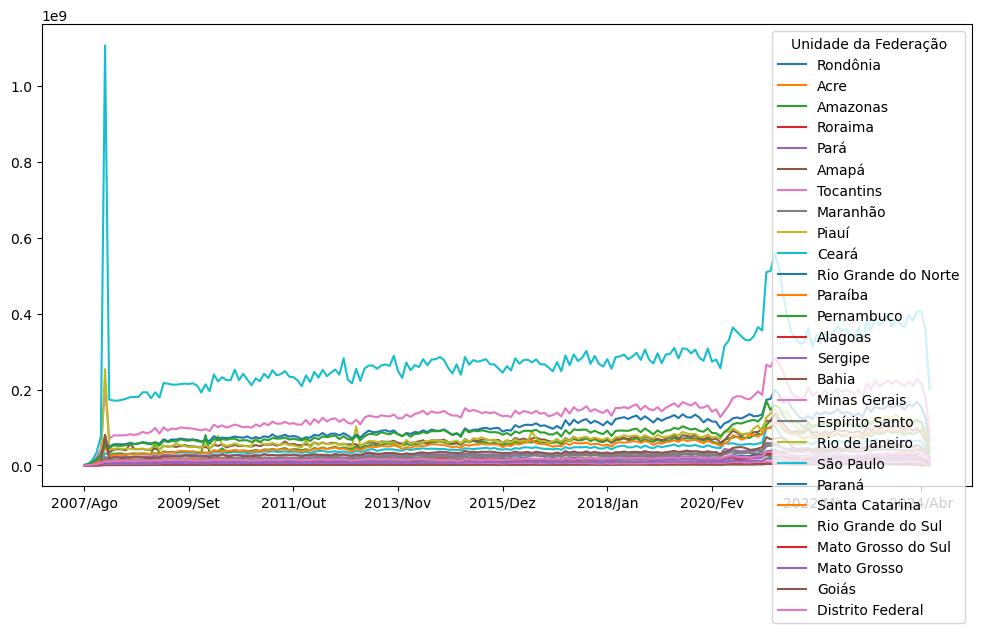

In [18]:
df_atendimento_clean.T.plot(figsize=(12,6))

##### **Desafios:**

1. Desafio 01: Retocar as legendas do gráfico em relação ao tamanho da fonte, para que fiquem legíveis.

2. Desafio 02: Colocar titulo e label nos gráficos.

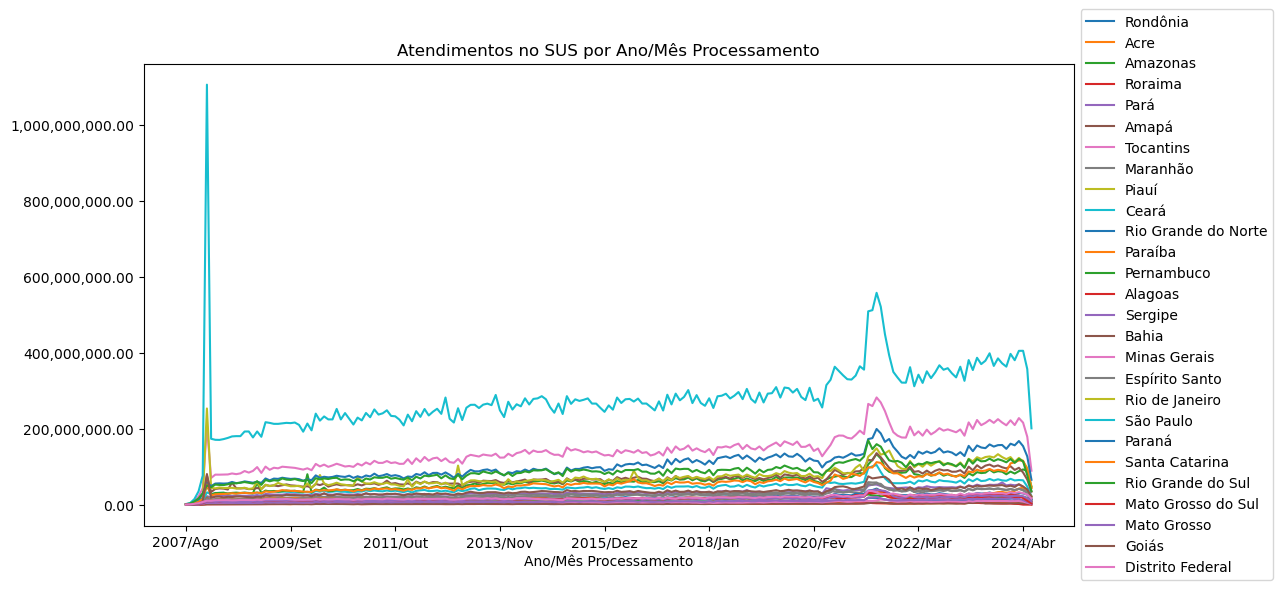

In [19]:
axis = df_atendimento_clean.T.plot(figsize=(12,6))
# Configurações do gráfico

plt.title('Atendimentos no SUS por Ano/Mês Processamento')
axis.xaxis.set_label_text('Ano/Mês Processamento') 
axis.legend(fontsize='x-large' )
axis.xaxis.set_tick_params(labelsize=10)
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

##### 4.2. Escolhendo dados ( Amostra "Aleatórias") para visualização.

In [20]:
np.random.seed(687942)
df_atendimento_clean.sample(n=7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
Espírito Santo,"57.408,11","284.224,80","1.152.115,25","2.296.383,23","5.724.199,54","16.212.109,41","10.032.886,43","12.262.049,08","12.453.466,98","11.789.786,09",...,"40.863.960,35","43.226.984,18","40.344.009,00","39.286.527,60","41.023.891,99","38.198.056,48","41.576.107,27","39.377.515,16","32.846.644,75","16.630.059,64"
Minas Gerais,"971.394,37","2.861.781,50","10.018.011,35","21.730.281,63","43.429.517,54","206.939.042,57","70.301.089,50","79.119.005,51","79.046.322,41","79.268.070,12",...,"215.469.980,31","225.270.555,83","216.383.028,31","209.148.368,56","222.300.157,90","209.800.599,55","228.100.016,47","216.082.730,78","178.930.809,27","89.499.683,35"
Rio Grande do Norte,"134.605,36","272.088,08","684.678,30","1.695.824,89","4.730.811,68","11.763.899,23","9.110.108,87","10.126.626,54","10.964.234,85","11.032.871,23",...,"29.011.621,93","27.563.700,89","29.938.094,14","29.627.053,61","29.822.675,77","28.067.199,91","30.877.615,80","29.437.407,10","26.353.416,08","12.848.792,62"
Tocantins,"4.113,76","76.633,06","343.702,61","1.068.685,94","3.022.200,87","5.136.474,61","5.051.932,07","5.200.151,87","5.343.714,73","5.344.487,99",...,"9.915.381,77","10.135.542,98","9.701.812,67","9.632.124,69","9.237.273,45","9.572.666,16","9.753.104,56","8.138.826,15","4.985.743,47","2.319.561,63"
Distrito Federal,"191.951,47","769.966,25","2.165.619,56","3.813.256,48","7.121.965,42","10.561.085,46","10.215.956,80","11.627.918,26","11.922.015,36","11.900.817,00",...,"29.713.259,55","30.187.348,58","30.333.611,10","28.496.571,04","32.489.750,27","30.483.598,45","32.893.309,19","30.192.534,69","26.884.393,81","16.034.609,37"
Mato Grosso do Sul,"199.556,12","573.675,41","1.069.816,66","1.995.899,52","4.277.979,14","8.301.006,10","8.279.288,79","9.793.888,78","8.997.542,75","9.842.108,59",...,"26.722.282,52","27.891.418,14","26.611.525,43","25.566.332,10","26.527.245,91","24.759.319,47","24.491.655,05","17.594.222,58","10.302.963,97","3.646.625,49"
Amapá,"33.672,74","104.822,98","118.378,28","226.661,18","844.019,90","1.329.876,61","1.275.063,72","1.177.745,93","1.396.371,51","1.411.520,77",...,"3.332.855,78","3.621.900,80","3.263.823,25","3.347.139,90","4.009.875,37","3.499.564,15","4.059.123,00","3.731.018,03","3.793.604,82","2.026.080,76"


<Axes: >

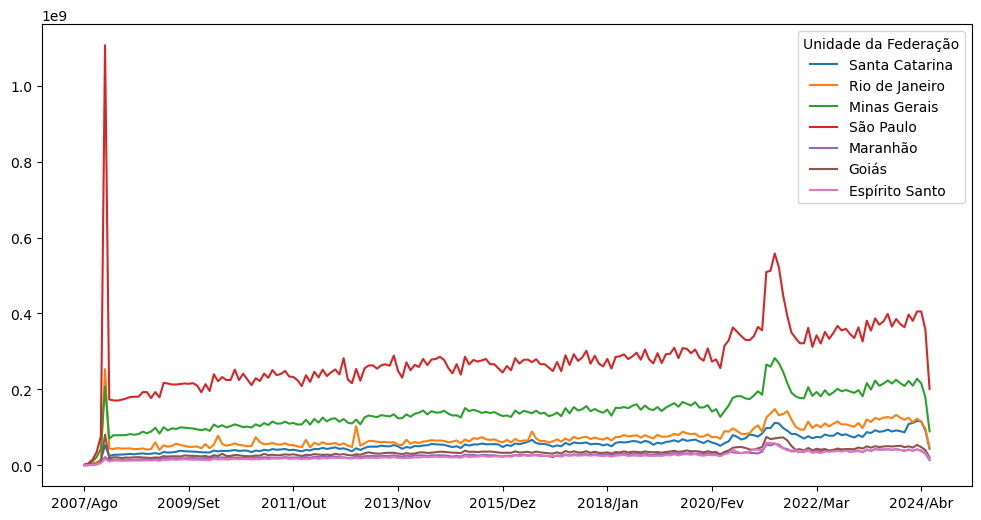

In [21]:
df_atendimento_clean.sample(n=7).T.plot(figsize=(12,6))

In [22]:
df_atendimento_clean['Total'] = df_atendimento_clean.sum(axis=1)
df_atendimento_clean.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
Rondônia,"4.209,37","16.397,03","133.645,19","346.912,84","711.758,31","1.829.559,71","1.940.792,63","1.955.721,68","2.143.353,81","2.280.382,58",...,"12.517.843,44","12.554.967,21","11.878.718,51","11.395.300,88","9.792.549,16","8.104.206,09","6.275.935,03","4.143.349,11","1.210.876,87","1.446.704.318,00"
Acre,"10.470,07","14.001,71","86.200,85","301.323,68","769.612,36","1.731.744,62","1.743.978,66","2.057.439,02","2.057.829,69","2.226.577,93",...,"4.433.998,52","4.436.469,66","4.253.339,65","4.404.809,58","4.478.164,90","4.764.699,46","4.488.757,08","3.406.321,94","1.574.829,36","615.415.320,66"
Amazonas,"35.752,72","45.570,64","416.012,30","2.020.381,79","5.949.408,99","11.419.210,08","7.934.652,10","8.641.517,13","8.531.576,49","9.079.902,15",...,"17.415.667,58","19.229.221,65","18.603.854,01","21.710.451,55","18.907.790,91","21.767.764,51","19.920.938,48","17.883.906,15","6.915.472,45","2.728.082.824,39"
Roraima,"4.785,91","11.858,63","43.852,67","369.328,51","470.676,43","808.448,39","771.687,83","876.091,18","896.952,53","1.027.288,73",...,"2.888.659,62","2.930.357,34","3.191.502,58","2.784.557,45","2.113.499,72","1.783.130,45","174.731,35","120.854,25","46.874,26","467.065.898,64"
Pará,"181.159,29","433.414,74","1.893.197,50","5.105.406,44","13.162.823,43","21.762.104,16","20.126.081,01","22.149.375,82","23.436.682,75","23.861.080,80",...,"52.858.032,69","58.378.834,51","50.760.448,73","52.655.209,50","51.032.476,18","53.019.044,69","46.891.419,15","34.678.768,60","13.453.260,79","6.589.300.989,37"


##### **Desafios:**

1. Desafio 01: Ordenar o do maior para o menor os estados que mais gastaram.


In [23]:
#Ordenando os valores pela coluna 'Total'
df_atendimento_clean = df_atendimento_clean.sort_values('Total', ascending=False)
df_atendimento_clean

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,"1.665.349,90","4.434.168,64","14.577.395,84","35.032.259,98","76.668.547,41","1.106.520.485,27","173.597.042,74","170.903.108,82","170.623.851,29","172.764.762,94",...,"385.374.458,64","372.199.641,41","363.664.832,51","397.238.888,73","380.600.275,32","405.238.898,93","405.415.546,71","357.246.934,02","201.122.009,15","56.541.250.392,38"
Minas Gerais,"971.394,37","2.861.781,50","10.018.011,35","21.730.281,63","43.429.517,54","206.939.042,57","70.301.089,50","79.119.005,51","79.046.322,41","79.268.070,12",...,"225.270.555,83","216.383.028,31","209.148.368,56","222.300.157,90","209.800.599,55","228.100.016,47","216.082.730,78","178.930.809,27","89.499.683,35","28.740.134.539,00"
Paraná,"554.800,22","1.431.708,01","4.630.402,44","11.120.030,79","28.790.722,87","58.081.334,45","48.855.046,46","55.611.791,07","56.115.135,82","55.574.831,93",...,"156.810.366,15","157.208.263,16","147.082.193,94","160.622.546,08","156.350.201,45","167.688.877,25","154.184.685,67","127.199.121,21","65.476.078,99","20.598.635.294,38"
Rio Grande do Sul,"1.049.252,33","3.182.913,14","8.571.312,11","16.592.432,80","30.134.255,70","51.064.610,03","45.897.704,82","52.928.695,92","51.972.416,77","51.679.350,79",...,"119.824.136,65","116.462.635,01","111.635.041,84","120.372.550,76","110.113.378,72","120.372.124,21","114.128.856,86","77.476.354,15","35.718.466,55","17.345.971.864,07"
Rio de Janeiro,"469.469,34","921.646,57","2.994.664,57","7.250.528,08","13.627.123,27","253.437.962,44","44.128.159,73","42.933.765,97","45.324.789,60","43.951.349,46",...,"132.952.839,20","125.403.561,99","119.919.274,06","125.351.624,45","112.879.820,43","123.235.922,60","113.767.297,88","96.747.362,37","45.599.827,60","14.957.727.370,69"
Bahia,"135.146,36","448.349,75","1.382.038,11","3.348.779,62","11.948.984,56","77.141.088,63","33.410.124,06","41.400.851,46","42.826.993,62","42.170.109,18",...,"103.374.215,51","98.554.035,65","95.459.134,18","101.309.815,12","91.419.828,81","97.196.666,40","84.744.298,49","66.032.184,30","34.321.087,03","13.607.614.403,85"
Pernambuco,"400.640,85","1.088.340,42","2.973.553,48","6.699.828,82","16.919.031,39","51.279.301,86","26.222.079,10","30.716.361,81","30.589.332,79","31.424.612,72",...,"88.194.077,78","86.774.277,81","80.096.762,66","87.154.661,78","81.983.296,27","88.256.016,78","92.833.652,07","88.546.267,22","47.996.539,69","12.010.976.906,96"
Santa Catarina,"693.955,05","1.092.964,12","3.562.300,82","7.578.502,38","14.772.555,10","53.034.384,67","24.409.572,92","27.483.480,50","27.806.641,44","28.354.279,52",...,"91.829.268,43","89.913.499,58","86.652.924,17","108.845.317,14","111.565.393,23","116.528.753,76","115.840.578,79","91.637.957,49","43.606.872,72","11.369.820.577,42"
Ceará,"357.904,65","572.356,18","1.865.065,71","5.131.814,39","10.798.042,86","32.444.328,54","27.643.304,86","30.085.370,22","31.376.221,00","31.189.904,62",...,"66.820.475,94","63.968.404,99","62.941.872,38","68.104.664,24","63.811.880,19","65.031.493,74","64.193.695,76","47.716.409,58","22.694.949,43","9.201.820.630,90"


2. Desafio 02: Adicionar uma coluna mostrando a região do Brasil que o estado pertence.

In [24]:
#criando listas com os nomes dos estados por região
norte = ['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins']
nordeste = ['Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia']
sudeste = ['Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo']
sul = ['Paraná', 'Santa Catarina', 'Rio Grande do Sul']
centro_oeste = ['Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal']

#criando a coluna 'Região' no dataframe
df_atendimento_clean['Região'] = 'NaN'

#atribuindo os valores de região de acordo com a lista de estados
for estado in norte:
    df_atendimento_clean.loc[estado, 'Região'] = 'Norte'
for estado in nordeste:
    df_atendimento_clean.loc[estado, 'Região'] = 'Nordeste'
for estado in sudeste:
    df_atendimento_clean.loc[estado, 'Região'] = 'Sudeste'
for estado in sul:
    df_atendimento_clean.loc[estado, 'Região'] = 'Sul'
for estado in centro_oeste:
    df_atendimento_clean.loc[estado, 'Região'] = 'Centro-Oeste'

df_atendimento_clean   


,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,Total,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,"1.665.349,90","4.434.168,64","14.577.395,84","35.032.259,98","76.668.547,41","1.106.520.485,27","173.597.042,74","170.903.108,82","170.623.851,29","172.764.762,94",...,"372.199.641,41","363.664.832,51","397.238.888,73","380.600.275,32","405.238.898,93","405.415.546,71","357.246.934,02","201.122.009,15","56.541.250.392,38",Sudeste
Minas Gerais,"971.394,37","2.861.781,50","10.018.011,35","21.730.281,63","43.429.517,54","206.939.042,57","70.301.089,50","79.119.005,51","79.046.322,41","79.268.070,12",...,"216.383.028,31","209.148.368,56","222.300.157,90","209.800.599,55","228.100.016,47","216.082.730,78","178.930.809,27","89.499.683,35","28.740.134.539,00",Sudeste
Paraná,"554.800,22","1.431.708,01","4.630.402,44","11.120.030,79","28.790.722,87","58.081.334,45","48.855.046,46","55.611.791,07","56.115.135,82","55.574.831,93",...,"157.208.263,16","147.082.193,94","160.622.546,08","156.350.201,45","167.688.877,25","154.184.685,67","127.199.121,21","65.476.078,99","20.598.635.294,38",Sul
Rio Grande do Sul,"1.049.252,33","3.182.913,14","8.571.312,11","16.592.432,80","30.134.255,70","51.064.610,03","45.897.704,82","52.928.695,92","51.972.416,77","51.679.350,79",...,"116.462.635,01","111.635.041,84","120.372.550,76","110.113.378,72","120.372.124,21","114.128.856,86","77.476.354,15","35.718.466,55","17.345.971.864,07",Sul
Rio de Janeiro,"469.469,34","921.646,57","2.994.664,57","7.250.528,08","13.627.123,27","253.437.962,44","44.128.159,73","42.933.765,97","45.324.789,60","43.951.349,46",...,"125.403.561,99","119.919.274,06","125.351.624,45","112.879.820,43","123.235.922,60","113.767.297,88","96.747.362,37","45.599.827,60","14.957.727.370,69",Sudeste
Bahia,"135.146,36","448.349,75","1.382.038,11","3.348.779,62","11.948.984,56","77.141.088,63","33.410.124,06","41.400.851,46","42.826.993,62","42.170.109,18",...,"98.554.035,65","95.459.134,18","101.309.815,12","91.419.828,81","97.196.666,40","84.744.298,49","66.032.184,30","34.321.087,03","13.607.614.403,85",Nordeste
Pernambuco,"400.640,85","1.088.340,42","2.973.553,48","6.699.828,82","16.919.031,39","51.279.301,86","26.222.079,10","30.716.361,81","30.589.332,79","31.424.612,72",...,"86.774.277,81","80.096.762,66","87.154.661,78","81.983.296,27","88.256.016,78","92.833.652,07","88.546.267,22","47.996.539,69","12.010.976.906,96",Nordeste
Santa Catarina,"693.955,05","1.092.964,12","3.562.300,82","7.578.502,38","14.772.555,10","53.034.384,67","24.409.572,92","27.483.480,50","27.806.641,44","28.354.279,52",...,"89.913.499,58","86.652.924,17","108.845.317,14","111.565.393,23","116.528.753,76","115.840.578,79","91.637.957,49","43.606.872,72","11.369.820.577,42",Sul
Ceará,"357.904,65","572.356,18","1.865.065,71","5.131.814,39","10.798.042,86","32.444.328,54","27.643.304,86","30.085.370,22","31.376.221,00","31.189.904,62",...,"63.968.404,99","62.941.872,38","68.104.664,24","63.811.880,19","65.031.493,74","64.193.695,76","47.716.409,58","22.694.949,43","9.201.820.630,90",Nordeste


3. Desafio 03:  Adicione seu estado aos estados que mais gastaram (amostra aleatória de 7 estados.)

In [25]:
#Adicionando o estado de 'Pernambuco' uma amostagem aleatória de 7 estados
estados = df_atendimento_clean.sample(n=7).index.to_list()
estados.append('Pernambuco')
estados


['Sergipe',
 'Mato Grosso',
 'Rio Grande do Sul',
 'Roraima',
 'Alagoas',
 'Maranhão',
 'Tocantins',
 'Pernambuco']

In [26]:
#selecionando os estados da lista 'estados' e ordenando pela coluna 'Total'
df_atendimento_clean.loc[estados].sort_values('Total', ascending=False)



,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,Total,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
Rio Grande do Sul,"1.049.252,33","3.182.913,14","8.571.312,11","16.592.432,80","30.134.255,70","51.064.610,03","45.897.704,82","52.928.695,92","51.972.416,77","51.679.350,79",...,"116.462.635,01","111.635.041,84","120.372.550,76","110.113.378,72","120.372.124,21","114.128.856,86","77.476.354,15","35.718.466,55","17.345.971.864,07",Sul
Pernambuco,"400.640,85","1.088.340,42","2.973.553,48","6.699.828,82","16.919.031,39","51.279.301,86","26.222.079,10","30.716.361,81","30.589.332,79","31.424.612,72",...,"86.774.277,81","80.096.762,66","87.154.661,78","81.983.296,27","88.256.016,78","92.833.652,07","88.546.267,22","47.996.539,69","12.010.976.906,96",Nordeste
Maranhão,"385.330,18","1.018.352,93","2.277.717,78","4.334.468,23","8.832.514,85","21.551.600,33","13.452.263,93","14.750.895,33","15.148.647,11","14.543.679,92",...,"40.501.098,01","38.004.052,79","41.497.369,48","38.607.311,23","41.885.979,98","37.522.351,20","30.708.318,49","13.741.492,12","5.464.036.259,98",Nordeste
Mato Grosso,"63.562,50","232.444,62","927.219,59","1.740.439,60","5.394.225,43","8.213.438,64","7.929.894,93","9.416.367,68","9.390.588,03","9.378.197,25",...,"23.435.504,35","22.223.573,01","22.716.136,68","23.044.436,85","23.311.259,77","22.341.470,01","16.971.852,55","8.865.991,19","3.113.084.183,08",Centro-Oeste
Alagoas,"104.243,75","174.024,90","595.544,54","1.125.396,73","2.564.966,65","16.767.595,99","8.112.220,30","9.210.505,56","10.466.691,94","9.844.096,03",...,"20.728.923,95","19.282.678,04","19.888.944,44","18.704.151,60","20.044.125,39","19.761.737,42","16.535.041,95","8.153.371,61","3.022.584.896,77",Nordeste
Sergipe,"27.453,63","78.565,19","122.952,94","775.705,52","2.765.495,63","5.439.985,99","4.636.850,76","5.017.838,07","5.265.951,03","5.367.094,94",...,"15.808.423,43","15.807.434,96","17.140.058,39","14.411.192,67","15.336.115,45","12.049.597,89","6.925.527,91","2.734.076,22","1.784.240.448,00",Nordeste
Tocantins,"4.113,76","76.633,06","343.702,61","1.068.685,94","3.022.200,87","5.136.474,61","5.051.932,07","5.200.151,87","5.343.714,73","5.344.487,99",...,"9.701.812,67","9.632.124,69","9.237.273,45","9.572.666,16","9.753.104,56","8.138.826,15","4.985.743,47","2.319.561,63","1.423.322.569,03",Norte
Roraima,"4.785,91","11.858,63","43.852,67","369.328,51","470.676,43","808.448,39","771.687,83","876.091,18","896.952,53","1.027.288,73",...,"2.930.357,34","3.191.502,58","2.784.557,45","2.113.499,72","1.783.130,45","174.731,35","120.854,25","46.874,26","467.065.898,64",Norte


<Axes: >

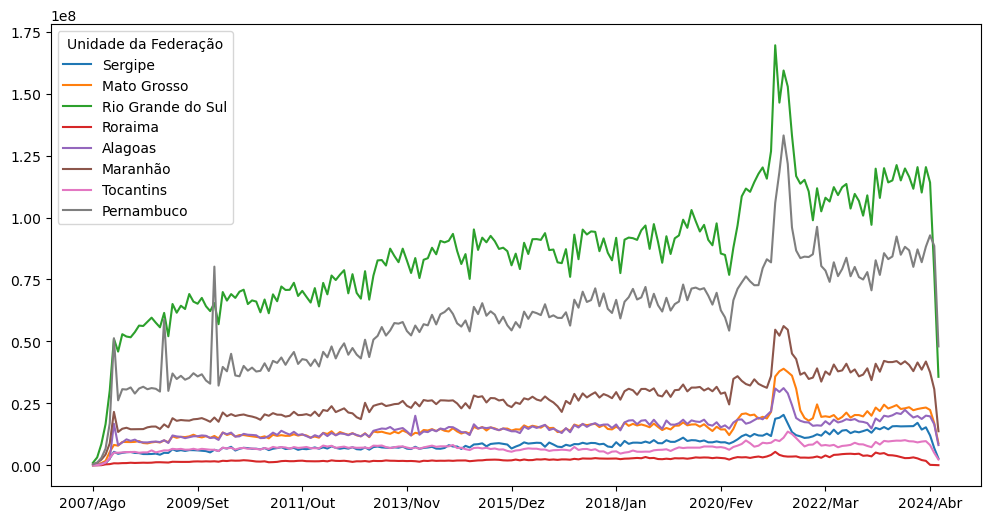

In [27]:
amostra_plot = df_atendimento_clean.loc[estados].drop(['Total', 'Região'], axis=1)
amostra_plot.T.plot(figsize=(12,6))


In [28]:
df_atendimento_clean = df_atendimento_clean.drop('Total', axis=1)
df_atendimento_clean

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,"1.665.349,90","4.434.168,64","14.577.395,84","35.032.259,98","76.668.547,41","1.106.520.485,27","173.597.042,74","170.903.108,82","170.623.851,29","172.764.762,94",...,"385.374.458,64","372.199.641,41","363.664.832,51","397.238.888,73","380.600.275,32","405.238.898,93","405.415.546,71","357.246.934,02","201.122.009,15",Sudeste
Minas Gerais,"971.394,37","2.861.781,50","10.018.011,35","21.730.281,63","43.429.517,54","206.939.042,57","70.301.089,50","79.119.005,51","79.046.322,41","79.268.070,12",...,"225.270.555,83","216.383.028,31","209.148.368,56","222.300.157,90","209.800.599,55","228.100.016,47","216.082.730,78","178.930.809,27","89.499.683,35",Sudeste
Paraná,"554.800,22","1.431.708,01","4.630.402,44","11.120.030,79","28.790.722,87","58.081.334,45","48.855.046,46","55.611.791,07","56.115.135,82","55.574.831,93",...,"156.810.366,15","157.208.263,16","147.082.193,94","160.622.546,08","156.350.201,45","167.688.877,25","154.184.685,67","127.199.121,21","65.476.078,99",Sul
Rio Grande do Sul,"1.049.252,33","3.182.913,14","8.571.312,11","16.592.432,80","30.134.255,70","51.064.610,03","45.897.704,82","52.928.695,92","51.972.416,77","51.679.350,79",...,"119.824.136,65","116.462.635,01","111.635.041,84","120.372.550,76","110.113.378,72","120.372.124,21","114.128.856,86","77.476.354,15","35.718.466,55",Sul
Rio de Janeiro,"469.469,34","921.646,57","2.994.664,57","7.250.528,08","13.627.123,27","253.437.962,44","44.128.159,73","42.933.765,97","45.324.789,60","43.951.349,46",...,"132.952.839,20","125.403.561,99","119.919.274,06","125.351.624,45","112.879.820,43","123.235.922,60","113.767.297,88","96.747.362,37","45.599.827,60",Sudeste
Bahia,"135.146,36","448.349,75","1.382.038,11","3.348.779,62","11.948.984,56","77.141.088,63","33.410.124,06","41.400.851,46","42.826.993,62","42.170.109,18",...,"103.374.215,51","98.554.035,65","95.459.134,18","101.309.815,12","91.419.828,81","97.196.666,40","84.744.298,49","66.032.184,30","34.321.087,03",Nordeste
Pernambuco,"400.640,85","1.088.340,42","2.973.553,48","6.699.828,82","16.919.031,39","51.279.301,86","26.222.079,10","30.716.361,81","30.589.332,79","31.424.612,72",...,"88.194.077,78","86.774.277,81","80.096.762,66","87.154.661,78","81.983.296,27","88.256.016,78","92.833.652,07","88.546.267,22","47.996.539,69",Nordeste
Santa Catarina,"693.955,05","1.092.964,12","3.562.300,82","7.578.502,38","14.772.555,10","53.034.384,67","24.409.572,92","27.483.480,50","27.806.641,44","28.354.279,52",...,"91.829.268,43","89.913.499,58","86.652.924,17","108.845.317,14","111.565.393,23","116.528.753,76","115.840.578,79","91.637.957,49","43.606.872,72",Sul
Ceará,"357.904,65","572.356,18","1.865.065,71","5.131.814,39","10.798.042,86","32.444.328,54","27.643.304,86","30.085.370,22","31.376.221,00","31.189.904,62",...,"66.820.475,94","63.968.404,99","62.941.872,38","68.104.664,24","63.811.880,19","65.031.493,74","64.193.695,76","47.716.409,58","22.694.949,43",Nordeste


#### Observação: 
Foi identificado um pico desproporcional na coluna 'Jan-2008' e foi feita a opção por remover todas as colunas de Janeiro de 2008 e anteriores.  para melhor visualização dos dados. Buscando justificar a remoção, foi feita a análise da média dos valores da coluna 'Jan-2008' e a média dos valores das demais colunas, e foi identificado que a média dos valores da coluna 'Jan-2008' é muito superior a média dos valores das demais colunas. Ou seja esse pico de valores pode ser considerado um outlier.

* Foi feita uma migração no sistema de dados do DATASUS que coincidiu com o pico de valores, e por isso foi feita a opção por removê-lo.

In [29]:
#Removendo as colunas de '2007/Ago até '2008/Jan'
df_atendimento_clean = df_atendimento_clean.drop(df_atendimento_clean.loc[:, '2007/Ago':'2008/Jan'].columns, axis=1)
df_atendimento_clean

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,"173.597.042,74","170.903.108,82","170.623.851,29","172.764.762,94","175.887.493,92","179.821.352,27","180.567.746,84","180.503.167,36","192.745.719,34","192.805.871,58",...,"385.374.458,64","372.199.641,41","363.664.832,51","397.238.888,73","380.600.275,32","405.238.898,93","405.415.546,71","357.246.934,02","201.122.009,15",Sudeste
Minas Gerais,"70.301.089,50","79.119.005,51","79.046.322,41","79.268.070,12","79.632.111,54","82.225.138,22","80.374.117,08","82.442.262,90","88.613.476,60","84.486.996,11",...,"225.270.555,83","216.383.028,31","209.148.368,56","222.300.157,90","209.800.599,55","228.100.016,47","216.082.730,78","178.930.809,27","89.499.683,35",Sudeste
Paraná,"48.855.046,46","55.611.791,07","56.115.135,82","55.574.831,93","56.094.754,74","59.802.402,07","56.699.001,13","58.091.985,79","61.365.941,22","59.667.208,62",...,"156.810.366,15","157.208.263,16","147.082.193,94","160.622.546,08","156.350.201,45","167.688.877,25","154.184.685,67","127.199.121,21","65.476.078,99",Sul
Rio Grande do Sul,"45.897.704,82","52.928.695,92","51.972.416,77","51.679.350,79","53.759.674,01","56.391.647,77","56.233.758,74","57.910.170,98","59.592.124,91","57.565.742,08",...,"119.824.136,65","116.462.635,01","111.635.041,84","120.372.550,76","110.113.378,72","120.372.124,21","114.128.856,86","77.476.354,15","35.718.466,55",Sul
Rio de Janeiro,"44.128.159,73","42.933.765,97","45.324.789,60","43.951.349,46","44.143.987,63","44.360.299,24","42.502.172,22","43.066.461,47","44.553.314,55","41.351.511,51",...,"132.952.839,20","125.403.561,99","119.919.274,06","125.351.624,45","112.879.820,43","123.235.922,60","113.767.297,88","96.747.362,37","45.599.827,60",Sudeste
Bahia,"33.410.124,06","41.400.851,46","42.826.993,62","42.170.109,18","39.910.042,40","57.664.560,93","43.254.543,33","42.851.268,02","43.332.573,68","40.946.908,97",...,"103.374.215,51","98.554.035,65","95.459.134,18","101.309.815,12","91.419.828,81","97.196.666,40","84.744.298,49","66.032.184,30","34.321.087,03",Nordeste
Pernambuco,"26.222.079,10","30.716.361,81","30.589.332,79","31.424.612,72","28.947.510,92","30.985.515,77","31.705.296,79","30.703.879,20","31.165.074,59","30.889.234,12",...,"88.194.077,78","86.774.277,81","80.096.762,66","87.154.661,78","81.983.296,27","88.256.016,78","92.833.652,07","88.546.267,22","47.996.539,69",Nordeste
Santa Catarina,"24.409.572,92","27.483.480,50","27.806.641,44","28.354.279,52","28.993.292,76","30.049.455,69","28.887.854,62","30.725.718,78","31.274.395,62","29.998.635,78",...,"91.829.268,43","89.913.499,58","86.652.924,17","108.845.317,14","111.565.393,23","116.528.753,76","115.840.578,79","91.637.957,49","43.606.872,72",Sul
Ceará,"27.643.304,86","30.085.370,22","31.376.221,00","31.189.904,62","29.463.965,11","30.302.691,99","29.304.821,51","30.435.026,82","31.741.382,87","30.415.959,60",...,"66.820.475,94","63.968.404,99","62.941.872,38","68.104.664,24","63.811.880,19","65.031.493,74","64.193.695,76","47.716.409,58","22.694.949,43",Nordeste


In [30]:
### Salvando o DataFrame em um arquivo CSV
df_atendimento_clean.to_csv('../../data/processed/Datacleaned2008to2024.csv')

### 4.4. Plotando o grafico da amostra aleatória de 7 estados.

<Axes: >

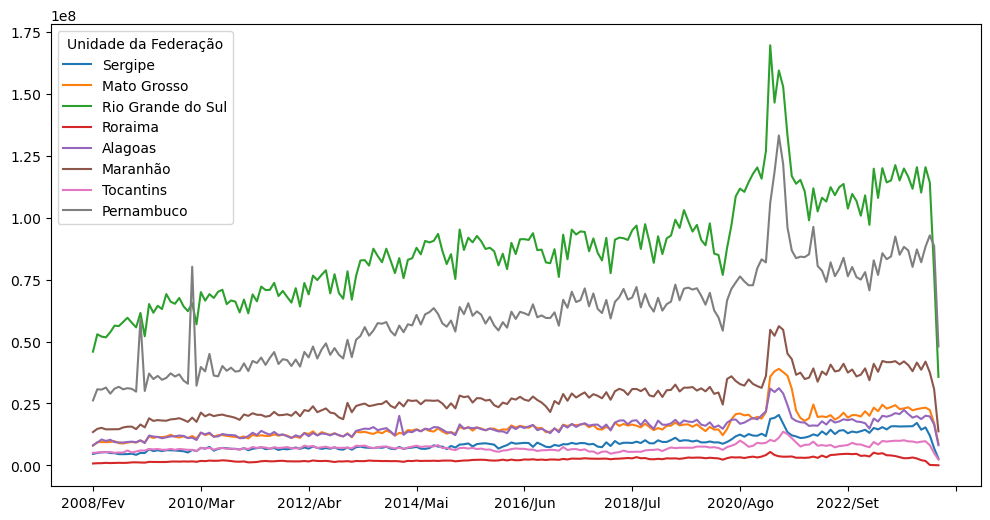

In [31]:
amostra_plot = df_atendimento_clean.loc[estados].drop('Região', axis=1)
amostra_plot.T.plot(figsize=(12,6))


### Desafios:
1. Desafio 01: Deixar o grafico mais refinado

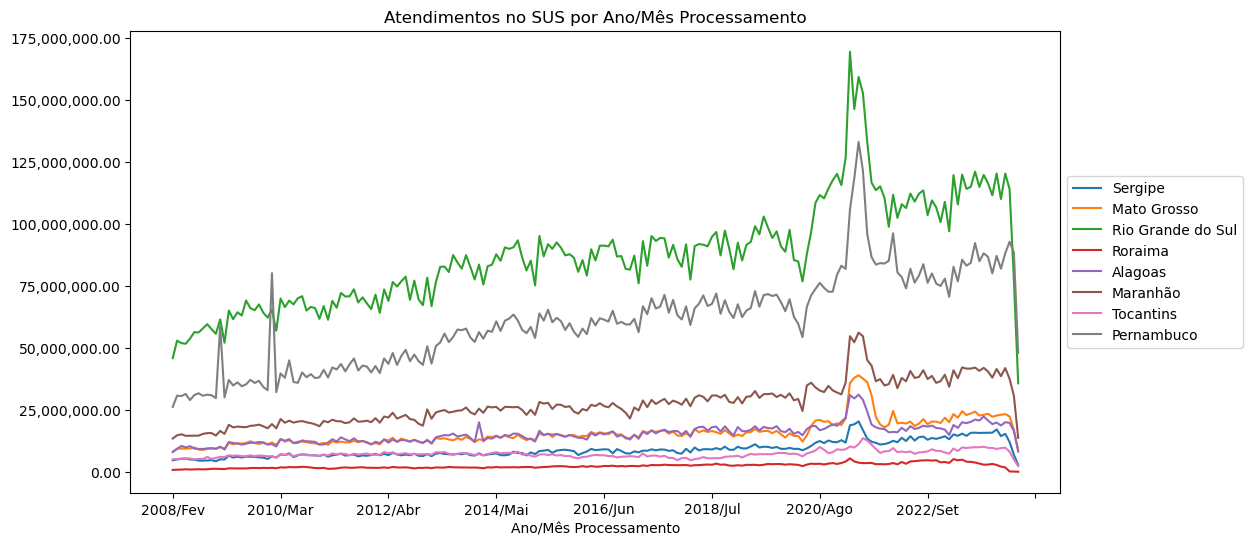

In [32]:
amostra_plot = df_atendimento_clean.loc[estados].drop('Região', axis=1)
axis = amostra_plot.T.plot(figsize=(12,6))
# Configurações do gráfico
plt.title('Atendimentos no SUS por Ano/Mês Processamento')
axis.xaxis.set_label_text('Ano/Mês Processamento')
axis.legend(title='Estados', title_fontsize='x-large', fontsize='x-large')
axis.xaxis.set_tick_params(labelsize=10)
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

2.Desafio 03:  Pesquisar os casos de Dengue no Brasil e vericar se existe alguma relação com os picos de valores.

* Pesquisa de Casos de Dengue no Brasil no DATASUS
Foi feita uma pesquisa no DATASUS para verificar se existe alguma relação entre os picos de valores e os casos de Dengue no Brasil. Pela Tabela DENGUE - Notificações registradas no Sistema de Informação de Agravos de Notificação - Brasil e se houve hospitalização ou não decorrente da dengue. Os Dados estão totalizados por mês e abrangem os anos de 2014 até 2024 (até o mes de julho de 2024)

In [33]:
dengue_BR = pd.read_csv('/home/naina/Projects/pos_fiap/fase_01/data/raw/dengue_AIH.csv', encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=26, thousands='.', decimal=',', engine='python')
dengue_BR 

,Mês 1º Sintoma(s),Ign/Branco,Sim,Não,Total
0,Ign/Branco,84,-,9,93
1,Janeiro,217902,15482,232653,466037
2,Fevereiro,394026,21162,385353,800541
3,Marco,576763,29120,578328,1184211
4,Abril,605482,31994,653783,1291259
5,Maio,445298,27305,488022,960625
6,Junho,178124,14128,188273,380525
7,Julho,78553,7466,79550,165569
8,Agosto,52145,4777,47032,103954
9,Setembro,45848,3691,37350,86889


In [34]:
#exlcuindo as linhas 0 e 13 e a coluna 'Ign/Branco' que não será utilizada
dengue_BR = dengue_BR.drop([0, 13], axis=0)
dengue_BR = dengue_BR.drop(['Ign/Branco', 'Não', 'Total'], axis=1).reset_index(drop=True)

dengue_BR

,Mês 1º Sintoma(s),Sim
0,Janeiro,15482
1,Fevereiro,21162
2,Marco,29120
3,Abril,31994
4,Maio,27305
5,Junho,14128
6,Julho,7466
7,Agosto,4777
8,Setembro,3691
9,Outubro,3880


In [35]:
#calculando o total de gastos no Brasil por Mês/Ano
df_gastos_total =  df_atendimento_clean.drop('Região', axis=1).sum().to_frame('Total Gasto')
df_gastos_total

,Total Gasto
2008/Fev,"643.810.427,11"
2008/Mar,"699.215.725,47"
2008/Abr,"708.055.709,73"
2008/Mai,"708.290.270,44"
2008/Jun,"708.642.310,41"
...,...
2024/Fev,"1.737.569.793,32"
2024/Mar,"1.863.683.517,15"
2024/Abr,"1.772.295.924,13"
2024/Mai,"1.461.662.112,83"


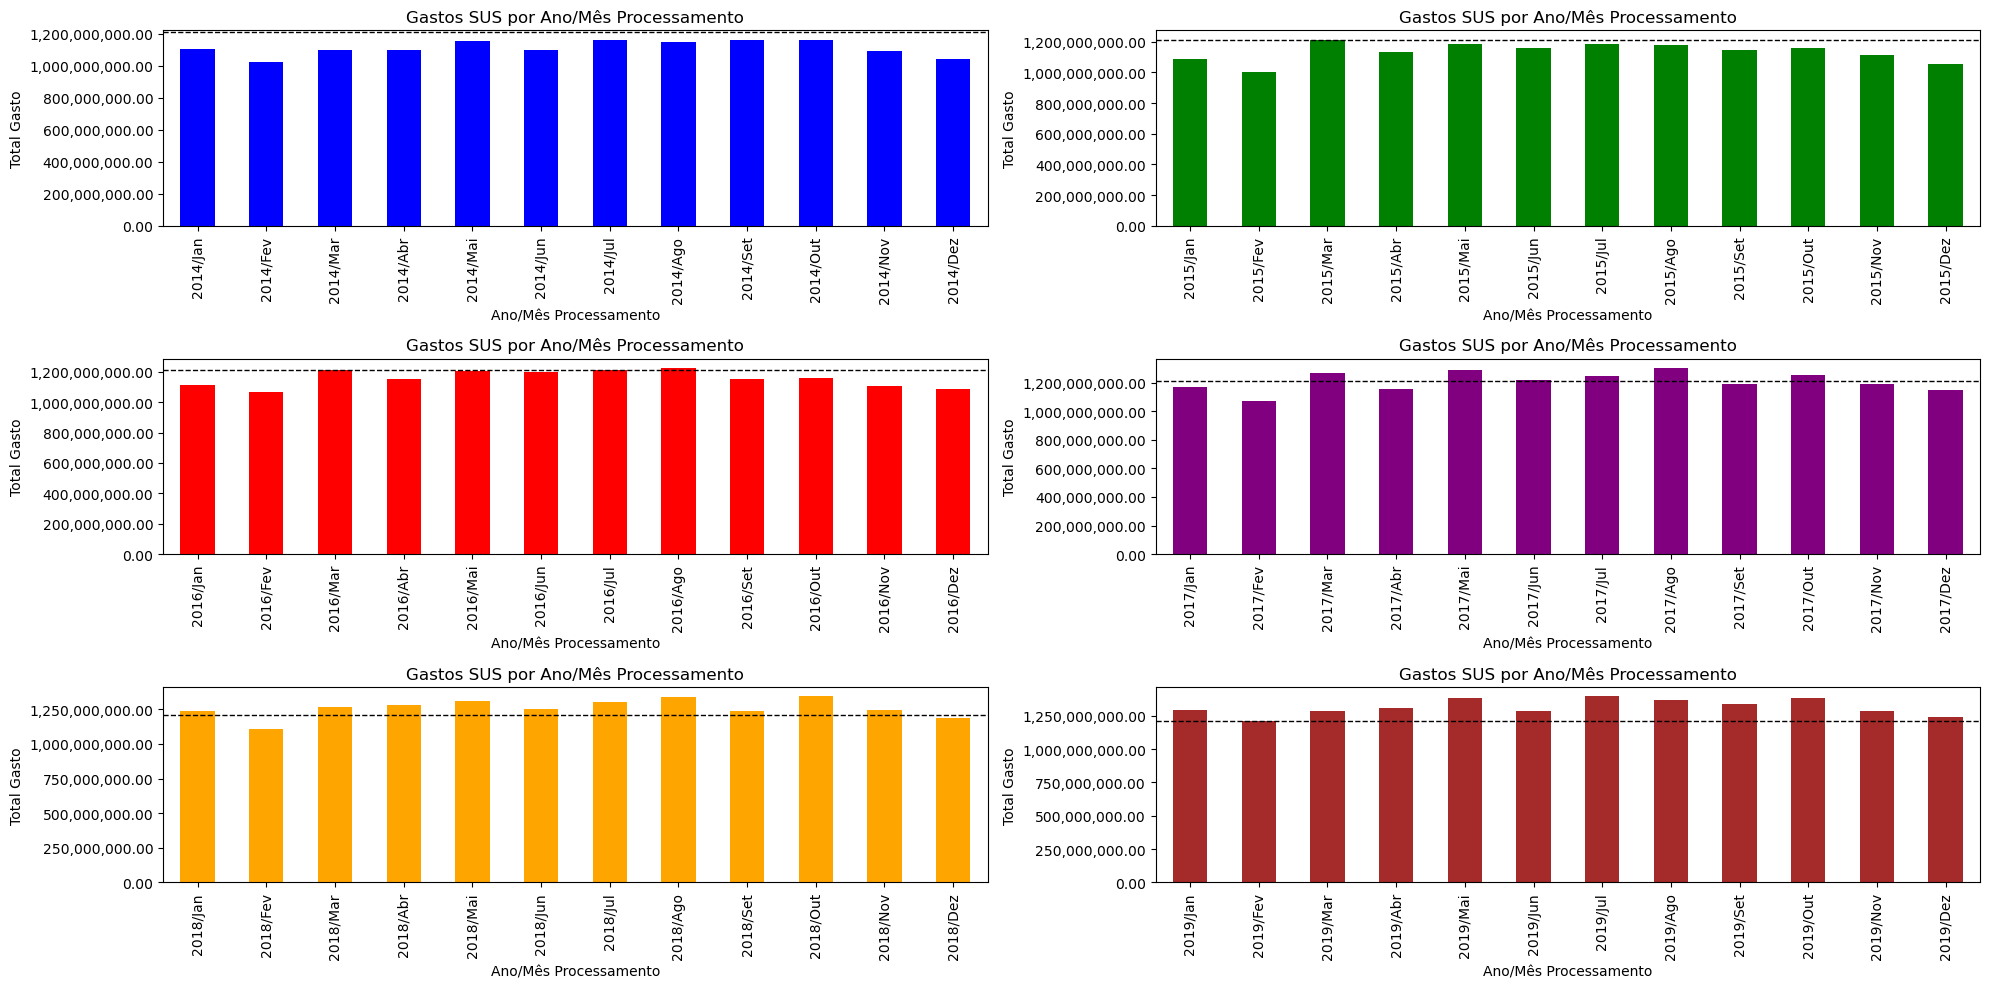

In [36]:
#plotando o gráfico de gastos escolhendo as colunas de Janeiro a Dezembro separados por ano em subplots ( para o df_atendimento_clean)
# Seleciona os dados para os intervalos de 2014 e 2019(Desconsiderando os anos de 2020 a 2024 ) 
df_2014 = df_gastos_total ['2014/Jan':'2014/Dez']
df_2015 = df_gastos_total ['2015/Jan':'2015/Dez']
df_2016 = df_gastos_total ['2016/Jan':'2016/Dez']
df_2017 = df_gastos_total ['2017/Jan':'2017/Dez']
df_2018 = df_gastos_total ['2018/Jan':'2018/Dez']
df_2019 = df_gastos_total ['2019/Jan':'2019/Dez']

# Cria a figura e os eixos
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))


#criando os subplots  em dois graficos por linha de plotagem
df_2014.plot(kind='bar', ax=axs[0, 0], color='blue')
df_2015.plot(kind='bar', ax=axs[0, 1], color='green')
df_2016.plot(kind='bar', ax=axs[1, 0], color='red')
df_2017.plot(kind='bar', ax=axs[1, 1], color='purple')
df_2018.plot(kind='bar', ax=axs[2, 0], color='orange')
df_2019.plot(kind='bar', ax=axs[2, 1], color='brown')


# Configurações dos gráficos
for ax in axs.flat:
    ax.set_title('Gastos SUS por Ano/Mês Processamento')
    ax.set_xlabel('Ano/Mês Processamento')
    ax.set_ylabel('Total Gasto')
    ax.xaxis.set_tick_params(labelsize=10)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
    ax.legend().set_visible(False)
    ax.axhline(df_gastos_total['Total Gasto'].mean(), color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()


#### **Análise dos Dados:**
Foi feita a análise dos dados de casos de Dengue no Brasil, e foi identificado que os picos de valores de casos de Dengue no Brasil aumentam consideravelmente entre os meses de fevereiro e março. O que não corresponde com os picos de valores do dataset de gastos hospitalares. Portanto, não foi identificada nenhuma relação entre os picos de valores de gastos hospitalares e os casos de Dengue no Brasil. Isso pode dever-se a outros fatores que não foram identificados na análise.Ao fato que na tabela de gastos temos dados de hospitalização e não de casos de doenças. E como podemos demostrar comparando o numero de casos de dengue com o numero de hospitalizações por dengue, o numero de casos é muito superior ao numero de hospitalizações.

3. Desafio 03:  Plotar o grafico de apenas uma região do Brasil.

In [37]:
df_atendimento_clean

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,"173.597.042,74","170.903.108,82","170.623.851,29","172.764.762,94","175.887.493,92","179.821.352,27","180.567.746,84","180.503.167,36","192.745.719,34","192.805.871,58",...,"385.374.458,64","372.199.641,41","363.664.832,51","397.238.888,73","380.600.275,32","405.238.898,93","405.415.546,71","357.246.934,02","201.122.009,15",Sudeste
Minas Gerais,"70.301.089,50","79.119.005,51","79.046.322,41","79.268.070,12","79.632.111,54","82.225.138,22","80.374.117,08","82.442.262,90","88.613.476,60","84.486.996,11",...,"225.270.555,83","216.383.028,31","209.148.368,56","222.300.157,90","209.800.599,55","228.100.016,47","216.082.730,78","178.930.809,27","89.499.683,35",Sudeste
Paraná,"48.855.046,46","55.611.791,07","56.115.135,82","55.574.831,93","56.094.754,74","59.802.402,07","56.699.001,13","58.091.985,79","61.365.941,22","59.667.208,62",...,"156.810.366,15","157.208.263,16","147.082.193,94","160.622.546,08","156.350.201,45","167.688.877,25","154.184.685,67","127.199.121,21","65.476.078,99",Sul
Rio Grande do Sul,"45.897.704,82","52.928.695,92","51.972.416,77","51.679.350,79","53.759.674,01","56.391.647,77","56.233.758,74","57.910.170,98","59.592.124,91","57.565.742,08",...,"119.824.136,65","116.462.635,01","111.635.041,84","120.372.550,76","110.113.378,72","120.372.124,21","114.128.856,86","77.476.354,15","35.718.466,55",Sul
Rio de Janeiro,"44.128.159,73","42.933.765,97","45.324.789,60","43.951.349,46","44.143.987,63","44.360.299,24","42.502.172,22","43.066.461,47","44.553.314,55","41.351.511,51",...,"132.952.839,20","125.403.561,99","119.919.274,06","125.351.624,45","112.879.820,43","123.235.922,60","113.767.297,88","96.747.362,37","45.599.827,60",Sudeste
Bahia,"33.410.124,06","41.400.851,46","42.826.993,62","42.170.109,18","39.910.042,40","57.664.560,93","43.254.543,33","42.851.268,02","43.332.573,68","40.946.908,97",...,"103.374.215,51","98.554.035,65","95.459.134,18","101.309.815,12","91.419.828,81","97.196.666,40","84.744.298,49","66.032.184,30","34.321.087,03",Nordeste
Pernambuco,"26.222.079,10","30.716.361,81","30.589.332,79","31.424.612,72","28.947.510,92","30.985.515,77","31.705.296,79","30.703.879,20","31.165.074,59","30.889.234,12",...,"88.194.077,78","86.774.277,81","80.096.762,66","87.154.661,78","81.983.296,27","88.256.016,78","92.833.652,07","88.546.267,22","47.996.539,69",Nordeste
Santa Catarina,"24.409.572,92","27.483.480,50","27.806.641,44","28.354.279,52","28.993.292,76","30.049.455,69","28.887.854,62","30.725.718,78","31.274.395,62","29.998.635,78",...,"91.829.268,43","89.913.499,58","86.652.924,17","108.845.317,14","111.565.393,23","116.528.753,76","115.840.578,79","91.637.957,49","43.606.872,72",Sul
Ceará,"27.643.304,86","30.085.370,22","31.376.221,00","31.189.904,62","29.463.965,11","30.302.691,99","29.304.821,51","30.435.026,82","31.741.382,87","30.415.959,60",...,"66.820.475,94","63.968.404,99","62.941.872,38","68.104.664,24","63.811.880,19","65.031.493,74","64.193.695,76","47.716.409,58","22.694.949,43",Nordeste


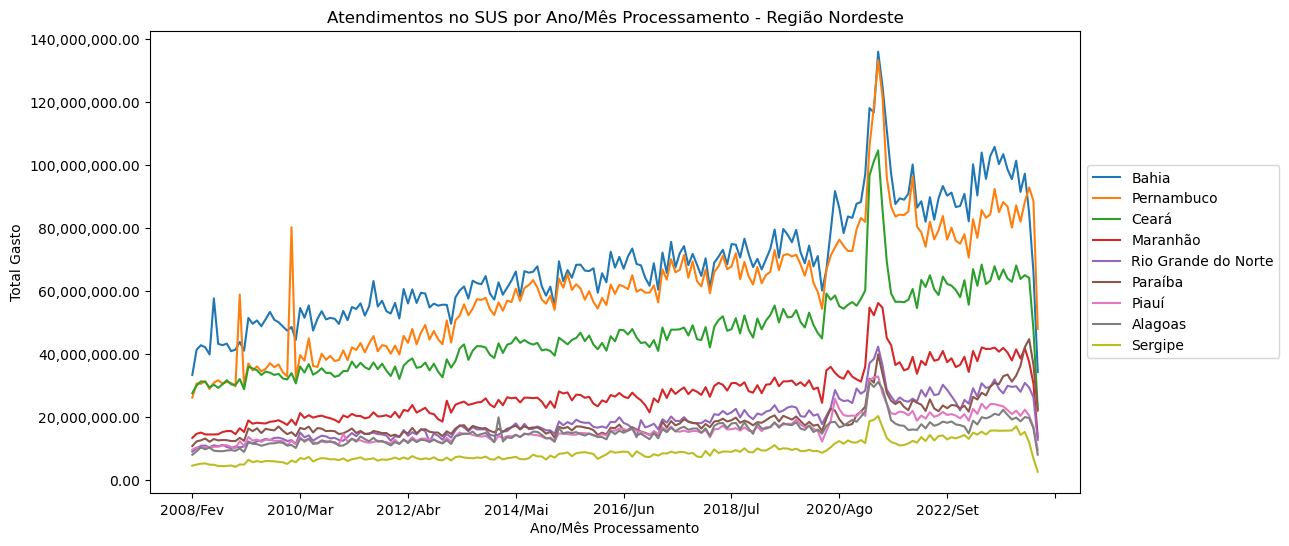

In [38]:
#plotando o grafico apenas da região Nordeste
df_atendimento_clean[df_atendimento_clean['Região'] == 'Nordeste'].drop('Região', axis=1).T.plot(figsize=(12,6))
# Configurações do gráfico
plt.title('Atendimentos no SUS por Ano/Mês Processamento - Região Nordeste')
plt.xlabel('Ano/Mês Processamento')
plt.ylabel('Total Gasto')
plt.gca().xaxis.set_tick_params(labelsize=10)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(title='Estados', title_fontsize='x-large', fontsize='x-large')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()





4. Desafio 04: Refinando ainda mais o gráfico.

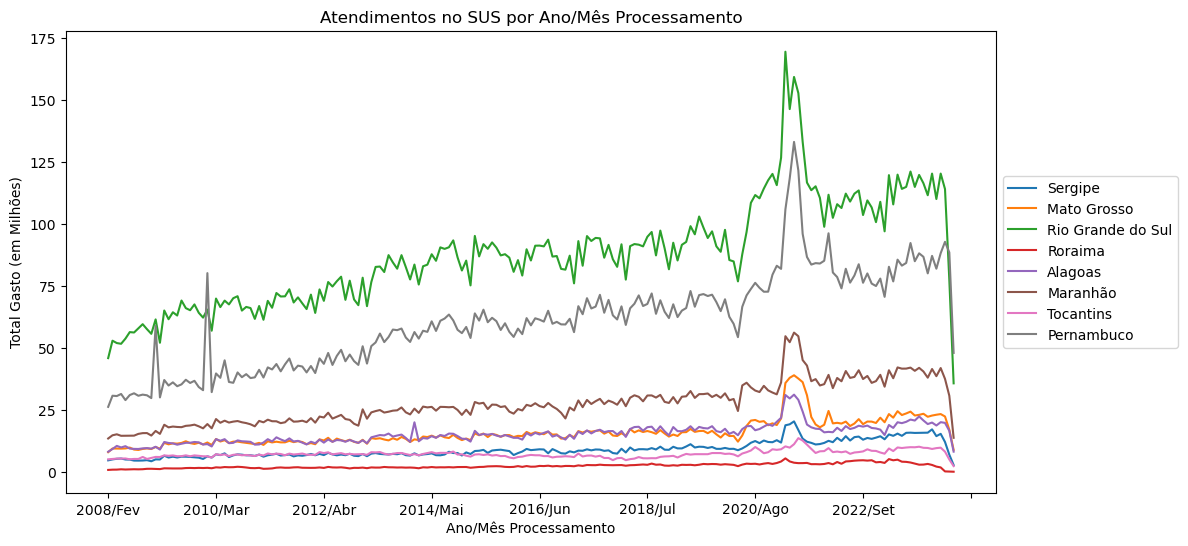

In [39]:
amostra_plot = df_atendimento_clean.loc[estados].drop('Região', axis=1)
amostra_plot = amostra_plot/1000000
axis = amostra_plot.T.plot(figsize=(12,6))

# Configurações do gráfico
plt.title('Atendimentos no SUS por Ano/Mês Processamento')
axis.xaxis.set_label_text('Ano/Mês Processamento')
axis.yaxis.set_label_text('Total Gasto (em Milhões)')
axis.legend(title='Estados', title_fontsize='x-large', fontsize='x-large')
axis.xaxis.set_tick_params(labelsize=10)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

* Filtrando os dados por colunas de interesse( para esse caso)

In [40]:
amostra_plot.columns

Index(['2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun', '2008/Jul',
       '2008/Ago', '2008/Set', '2008/Out', '2008/Nov',
       ...
       '2023/Set', '2023/Out', '2023/Nov', '2023/Dez', '2024/Jan', '2024/Fev',
       '2024/Mar', '2024/Abr', '2024/Mai', '2024/Jun'],
      dtype='object', length=197)

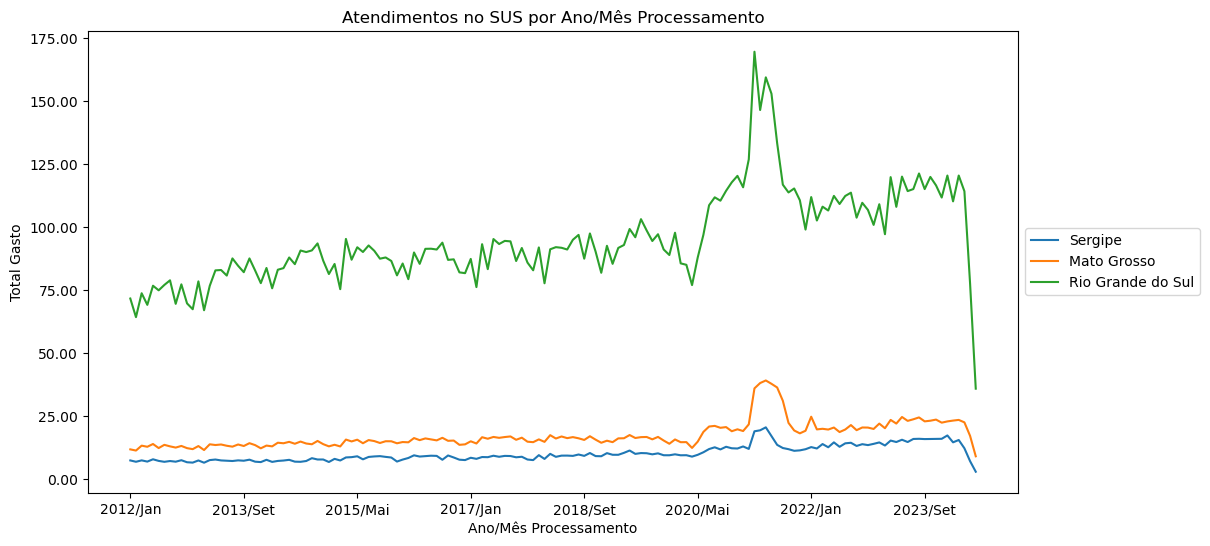

In [41]:
meses_fitrados = amostra_plot.columns[47:]
axis = amostra_plot[meses_fitrados].head(3).T.plot(figsize=(12,6))

# Configurações do gráfico
plt.title('Atendimentos no SUS por Ano/Mês Processamento')
plt.xlabel('Ano/Mês Processamento')
plt.ylabel('Total Gasto')
plt.gca().xaxis.set_tick_params(labelsize=10)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(title='Estados', title_fontsize='x-large', fontsize='x-large')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

##### **Observação:**
Foi criada a função plot_state_spending no diretório de scripts que recebe um DataFrame e plota um gráfico de barras com os gastos hospitalares de um estado específico. A função foi utilizada para plotar o gráfico de gastos hospitalares do estado de São Paulo, que é a região mais populosa do Brasil e um dos estados que mais gastam com atendimentos hospitalares.

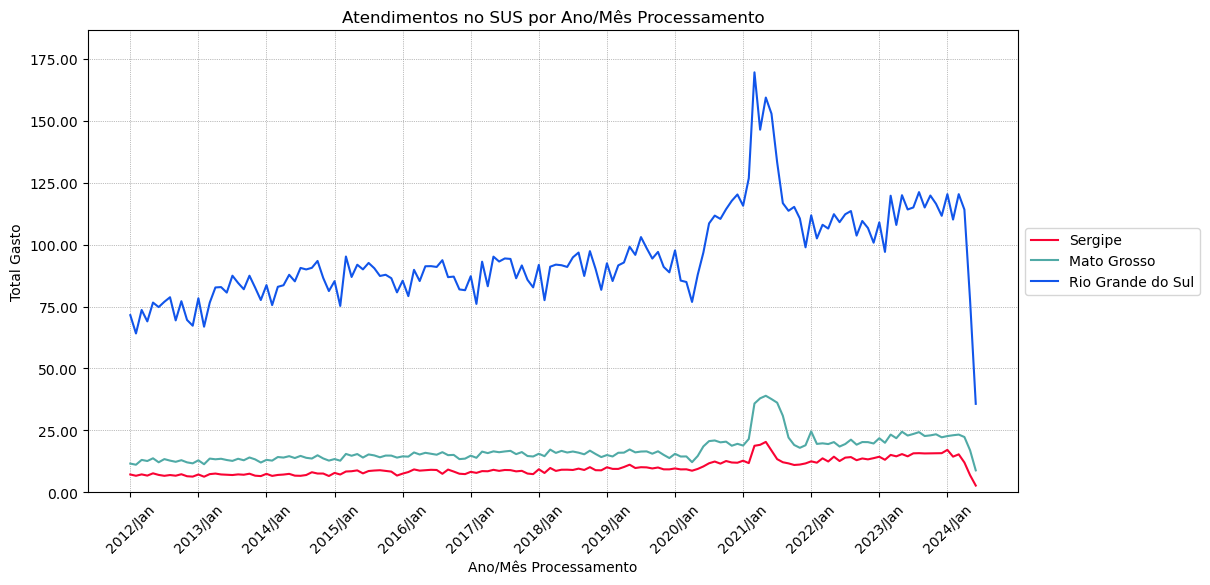

In [42]:
plot_state_spending(amostra_plot[meses_fitrados].head(3))

#### Desafios:
1. Desafio 01: Padronizar os ticks do eixo x para que apareçam de 12 e 12 meses 
2. Desafio 02: Utilizar uma palete de cores 
3. Desafio 03: Utilizar um grid na visualização

* Selecionada uma nova amostra com 5 estados para melhor visualização. Os desafios foram realizados com modificações diretas no código da função plot_state_spending.

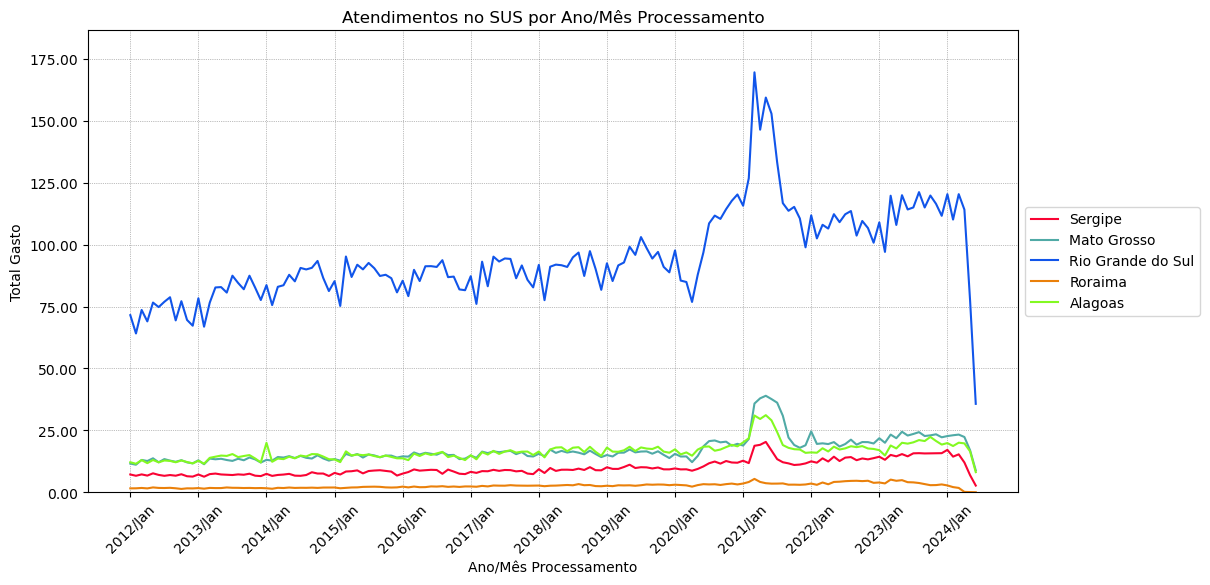

In [43]:
amostra2_plot = df_atendimento_clean.loc[estados].drop('Região', axis=1)
amostra2_plot = amostra2_plot/1000000
plot_state_spending(amostra2_plot[meses_fitrados].head(5))

## 5.0 Manipulação e Interpretação de Graficos

#### Desafios:
1. Desafio 01 : ordenar os gastos por total e plotar grafico de barras 

<Axes: xlabel='Unidade da Federação'>

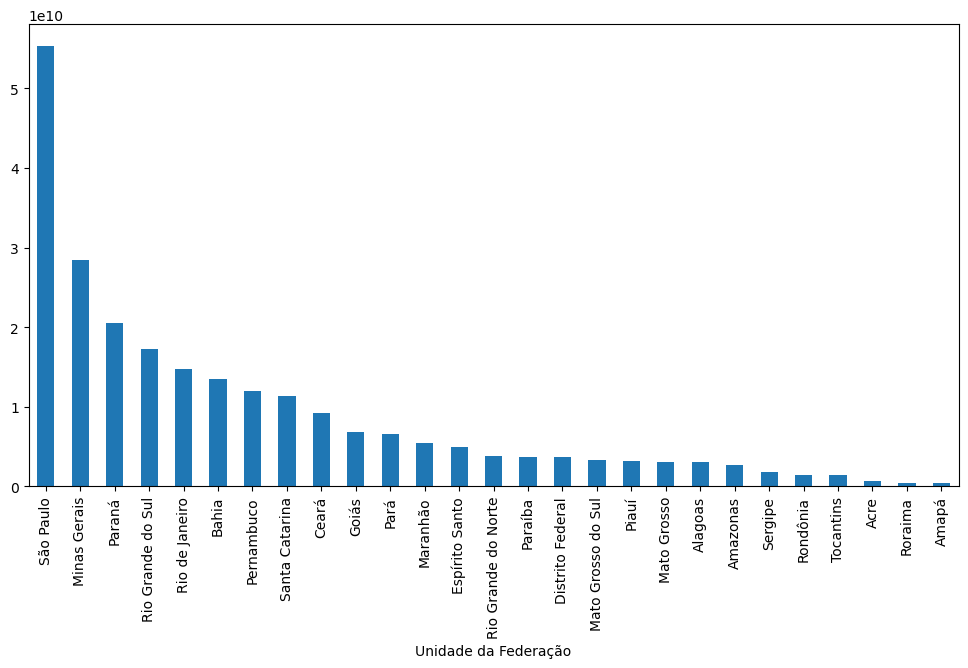

In [44]:
order_total = df_atendimento_clean.drop('Região', axis=1)
order_total['Total'] = order_total.sum(axis=1)
order_total = order_total.sort_values('Total', ascending=False)
order_total_geral = order_total['Total']
order_total_geral.plot(kind='bar', figsize=(12,6))

2. Desafio 02 : Atualizar o gráfico com grid eixos e refinar a apresentação

In [45]:
#Divido o total por 1 bilhão para melhor visualização
order_total_geral = order_total_geral/1000000000

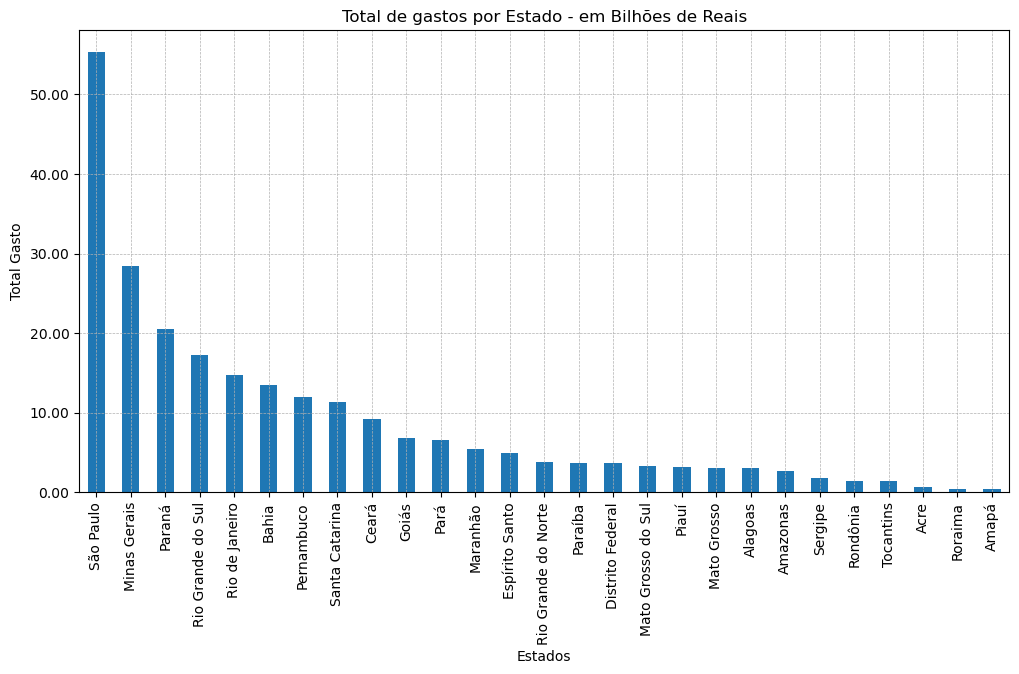

In [46]:
# Plotando o gráfico
axis = order_total_geral.plot(kind='bar', figsize=(12,6))
plt.title('Total de gastos por Estado - em Bilhões de Reais')
plt.xlabel('Estados')
plt.ylabel('Total Gasto')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.grid(True,  linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_tick_params(labelsize=10)
plt.show()

  3. Desafio 03 : Colorir o seu estado de outra cor no gráfico

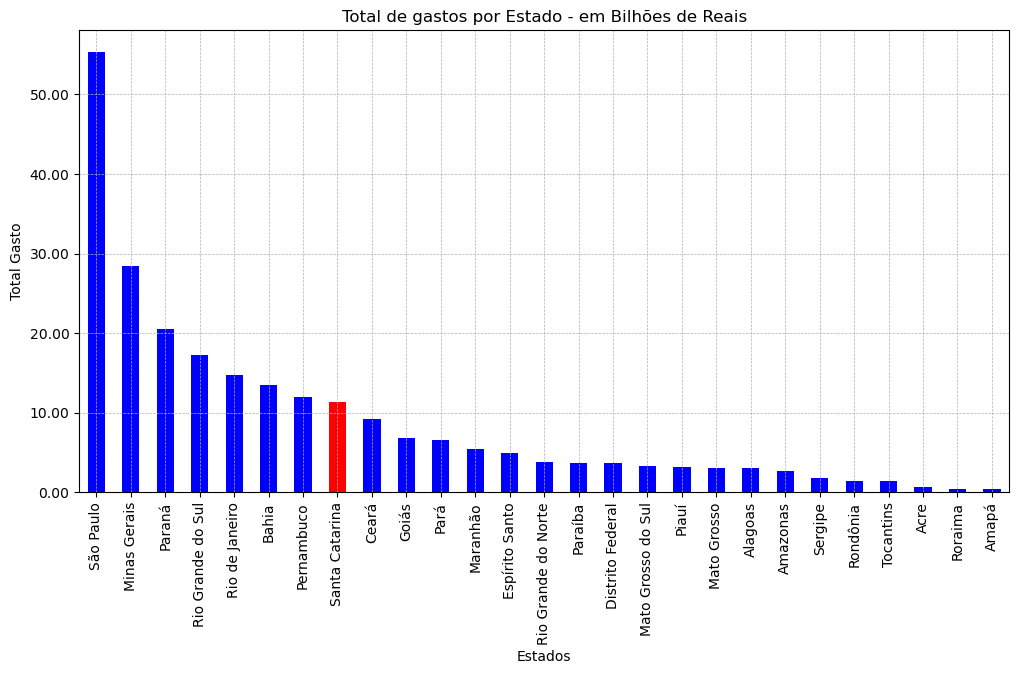

In [47]:

#Colorindo o estado de Permanbuco de vermelho
order_total_geral.plot(kind='bar', figsize=(12,6), color='blue')
plt.title('Total de gastos por Estado - em Bilhões de Reais')
plt.xlabel('Estados')
plt.ylabel('Total Gasto')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.grid(True,  linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_tick_params(labelsize=10)
plt.gca().patches[estados.index('Pernambuco')].set_facecolor('red')
plt.show()  

4. Desafio 04 : Adicionar uma linha horizontal no seu estado para comparar com os demais

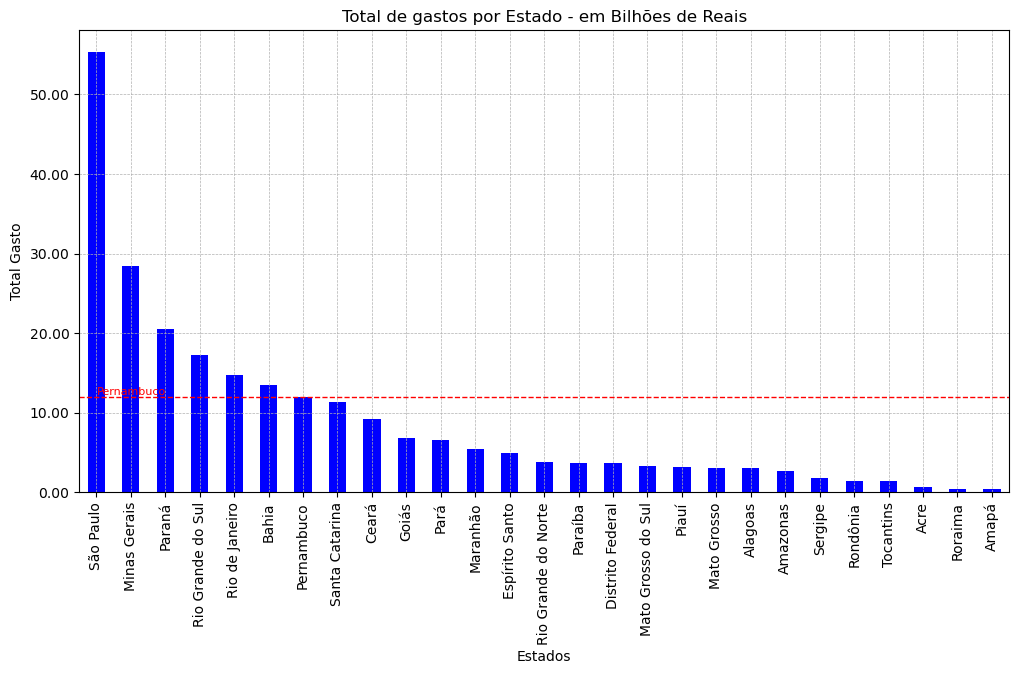

In [48]:
#Plotando o grafico de barras com uma liha horizontal representando o tatal de 'Pernambuco' como uma anotação de destaque
order_total_geral.plot(kind='bar', figsize=(12,6), color='blue')
plt.title('Total de gastos por Estado - em Bilhões de Reais')
plt.xlabel('Estados')
plt.ylabel('Total Gasto')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.grid(True,  linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_tick_params(labelsize=10)
plt.axhline(order_total_geral['Pernambuco'], linestyle='--', linewidth=1, color='red')
plt.text(0, order_total_geral['Pernambuco'], 'Pernambuco', color='red', fontsize=8 , va='bottom', ha='left')

plt.show()